# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,confusion_matrix

from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Jupyter Notebook beutification

In [2]:
sns.set_palette("Greens")
rn=42

Define CSS for Each header style

In [3]:
%%html
<style>
    .custom_header {
        font-size: 160%;
        color: midnightblue;
        font-family: calibri;
        font-weight: bold;
        text-align:left;
        padding-bottom: 0px;
    }
    .observation_text {
        font-size: 130%;
        color: gray;
        font-family: calibri;
        text-align:left;
        padding-bottom: 0px;
        text-decoration: underline;
    }
    .ans_text {
        font-size: 130%;
        color: green;
        font-family: calibri;
        text-align:left;
        padding-bottom: 0px;
        text-decoration: underline;
    }
</style>

## Loading the dataset

In [4]:
data=pd.read_csv("../data/bank_churners.csv")
df=data.copy()

In [5]:
df.sample(5)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
9210  721264533  Existing Customer            49      F                3   
516   767036433  Existing Customer            56      F                1   
4203  714106833  Existing Customer            57      F                3   
3810  713639058  Attrited Customer            49      M                3   
1737  720662508  Existing Customer            39      M                1   

     Education_Level Marital_Status Income_Category Card_Category  \
9210             NaN        Married  Less than $40K          Blue   
516         Graduate        Married  Less than $40K          Blue   
4203        Graduate            NaN  Less than $40K          Blue   
3810     High School        Married     $60K - $80K          Blue   
1737        Graduate        Married         $120K +          Blue   

      Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
9210              36  ...                       1                      3   
516               49  ...                       1                      0   
4203              47  ...                       3                      1   
3810              34  ...                       3                      3   
1737              25  ...                       3                      2   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
9210        3767.0                 1106           2661.0   
516         5097.0                 1152           3945.0   
4203        5225.0                 2290           2935.0   
3810        1511.0                    0           1511.0   
1737        5764.0                 1529           4235.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
9210                 0.944            15578             126   
516                  0.940             2052              45   
4203                 0.962             4239              69   
3810                 0.432             1329              35   
1737                 1.356             1972              38   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
9210                0.826                  0.294  
516                 0.607                  0.226  
4203                0.683                  0.438  
3810                0.591                  0.000  
1737                0.520                  0.265  

[5 rows x 21 columns]

## Data Overview

- Observations
- Sanity checks

<div class='custom_header'>Structure Check</div>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<div class= 'observation_text'>Observations:</div>

1. We have total 21 features
2. 15 features are numerical and 6 features are categorical
3. We can observe some missing values for Education_Level and Marital Status columns

<div class='custom_header'>Missing Value Check</div>

In [7]:
df.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<div class= 'observation_text'>Observations:</div>

As we have seen earlier Education_Level has 1519 and Marital Status has 749 missing values.

<div class='custom_header'>Duplicate Entries Check</div>

In [8]:
df.duplicated().sum()

0

<div class= 'observation_text'>Observations:</div>

There is no duplicate entries present in the dataset.

<div class='custom_header'>Basic Statistical Checks</div>

In [9]:
df.describe().applymap(lambda x: f"{x: .2f}").T

count           mean           std  \
CLIENTNUM                  10127.00   739177606.33   36903783.45   
Customer_Age               10127.00          46.33          8.02   
Dependent_count            10127.00           2.35          1.30   
Months_on_book             10127.00          35.93          7.99   
Total_Relationship_Count   10127.00           3.81          1.55   
Months_Inactive_12_mon     10127.00           2.34          1.01   
Contacts_Count_12_mon      10127.00           2.46          1.11   
Credit_Limit               10127.00        8631.95       9088.78   
Total_Revolving_Bal        10127.00        1162.81        814.99   
Avg_Open_To_Buy            10127.00        7469.14       9090.69   
Total_Amt_Chng_Q4_Q1       10127.00           0.76          0.22   
Total_Trans_Amt            10127.00        4404.09       3397.13   
Total_Trans_Ct             10127.00          64.86         23.47   
Total_Ct_Chng_Q4_Q1        10127.00           0.71          0.24   
Avg_Utilization_Ratio      10127.00           0.27          0.28   

                                    min            25%            50%  \
CLIENTNUM                  708082083.00   713036770.50   717926358.00   
Customer_Age                      26.00          41.00          46.00   
Dependent_count                    0.00           1.00           2.00   
Months_on_book                    13.00          31.00          36.00   
Total_Relationship_Count           1.00           3.00           4.00   
Months_Inactive_12_mon             0.00           2.00           2.00   
Contacts_Count_12_mon              0.00           2.00           2.00   
Credit_Limit                    1438.30        2555.00        4549.00   
Total_Revolving_Bal                0.00         359.00        1276.00   
Avg_Open_To_Buy                    3.00        1324.50        3474.00   
Total_Amt_Chng_Q4_Q1               0.00           0.63           0.74   
Total_Trans_Amt                  510.00        2155.50        3899.00   
Total_Trans_Ct                    10.00          45.00          67.00   
Total_Ct_Chng_Q4_Q1                0.00           0.58           0.70   
Avg_Utilization_Ratio              0.00           0.02           0.18   

                                    75%            max  
CLIENTNUM                  773143533.00   828343083.00  
Customer_Age                      52.00          73.00  
Dependent_count                    3.00           5.00  
Months_on_book                    40.00          56.00  
Total_Relationship_Count           5.00           6.00  
Months_Inactive_12_mon             3.00           6.00  
Contacts_Count_12_mon              3.00           6.00  
Credit_Limit                   11067.50       34516.00  
Total_Revolving_Bal             1784.00        2517.00  
Avg_Open_To_Buy                 9859.00       34516.00  
Total_Amt_Chng_Q4_Q1               0.86           3.40  
Total_Trans_Amt                 4741.00       18484.00  
Total_Trans_Ct                    81.00         139.00  
Total_Ct_Chng_Q4_Q1                0.82           3.71  
Avg_Utilization_Ratio              0.50           1.00

In [10]:
df.select_dtypes(include=['object']).describe().T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level   8608      6           Graduate  3128
Marital_Status    9378      3            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

<div class= 'observation_text'>Observations:</div>

1.	CLIENTNUM is a unique identifier, so we will drop this column.
2.	Age ranges between 26 and 73 years.
3.	The number of dependents a customer can have varies from 0 to 5.
4.	The minimum time a customer has been associated with the bank is 13 months, and the maximum is 56 months. The close mean and median suggest the data is likely not skewed.
5.	The total number of products held by each customer ranges from 1 to 6.
6.	We see that 75% of customers were inactive for a maximum of 3 months, while some were inactive for up to 6 months.
7.	The number of contacts between the customer and bank over the last 12 months ranges from 0 to 6.
8.	For credit limit on the credit card, the large gap between the mean and median indicates high skewness in the distribution.
9.	The balance that carries over from one month to the next ranges from 0 to 2517 dollars. The close mean and median suggest symmetry and a low skew in distribution. We’ll check the distribution further in EDA.
10.	The average amount left on the credit card to use over the last 12 months varies from 3 to 34,516 dollars, with a large gap between the mean and median, suggesting a highly skewed distribution.
11.	The ratio of the total transaction amount in the 4th quarter to the 1st quarter ranges from 0 to 3.40. The close mean and median values indicate a likely symmetric distribution.
12.	The total transaction amount over the last 12 months varies from 510 to 18,484 dollars.
13.	Over the last 12 months, total transaction count varies from 10 to 139, likely indicating a symmetric distribution.
14.	The ratio of the total transaction count in the 4th quarter to the 1st quarter ranges from 0 to 3.71.
15.	We see that some users used all available credit, while others didn’t use any at all.
16.	Among categorical values, there are some missing entries in Education Level and Marital Status; other categorical features look good. Each feature has a reasonable number of categories, but we should check their values further as a sanity check.

<div class='custom_header'>Categorical Value Check:</div>

In [11]:
print("Categorical Fetures are:",df.select_dtypes(include=['object']).columns.tolist())

Categorical Fetures are: ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [12]:
print("Feature Name: Attrition_Flag")
print("*"*80)
print("Possible Values are",df.Attrition_Flag.unique().tolist())
print("*"*80)
print("Distribtuion of:",df.Attrition_Flag.value_counts(dropna=False))

Feature Name: Attrition_Flag
********************************************************************************
Possible Values are ['Existing Customer', 'Attrited Customer']
********************************************************************************
Distribtuion of: Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


In [13]:
print("Feature Name: Gender")
print("*"*80)
print("Possible Values are",df.Gender.unique().tolist())
print("*"*80)
print("Distribtuion of:",df.Gender.value_counts(dropna=False))

Feature Name: Gender
********************************************************************************
Possible Values are ['M', 'F']
********************************************************************************
Distribtuion of: Gender
F    5358
M    4769
Name: count, dtype: int64


In [14]:
print("Feature Name: Education_Level")
print("*"*80)
print("Possible Values are",df.Education_Level.unique().tolist())
print("*"*80)
print("Distribtuion of:",df.Education_Level.value_counts(dropna=False))

Feature Name: Education_Level
********************************************************************************
Possible Values are ['High School', 'Graduate', 'Uneducated', nan, 'College', 'Post-Graduate', 'Doctorate']
********************************************************************************
Distribtuion of: Education_Level
Graduate         3128
High School      2013
NaN              1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64


In [15]:
print("Feature Name: Marital_Status")
print("*"*80)
print("Possible Values are",df.Marital_Status.unique().tolist())
print("*"*80)
print("Distribtuion of:",df.Marital_Status.value_counts(dropna=False))

Feature Name: Marital_Status
********************************************************************************
Possible Values are ['Married', 'Single', nan, 'Divorced']
********************************************************************************
Distribtuion of: Marital_Status
Married     4687
Single      3943
NaN          749
Divorced     748
Name: count, dtype: int64


In [16]:
print("Feature Name: Income_Category")
print("*"*80)
print("Possible Values are",df.Income_Category.unique().tolist())
print("*"*80)
print("Distribtuion of:",df.Income_Category.value_counts(dropna=False))

Feature Name: Income_Category
********************************************************************************
Possible Values are ['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +', 'abc']
********************************************************************************
Distribtuion of: Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64


In [17]:
print("Feature Name: Card_Category")
print("*"*80)
print("Possible Values are",df.Card_Category.unique().tolist())
print("*"*80)
print("Distribtuion of:",df.Card_Category.value_counts(dropna=False))

Feature Name: Card_Category
********************************************************************************
Possible Values are ['Blue', 'Gold', 'Silver', 'Platinum']
********************************************************************************
Distribtuion of: Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64


<div class= 'observation_text'>Observations:</div>

1. Most of the customer are existing customers where around 16% customer already left the bank. For building model we need to convert the target feature to numeric value.
2. Bank has more female customers than male customers.
3. 1518 entries has missing Education level.
4. 749 entries has missing marital status.
5. 1112 entries has abc value in income category, which looks some kind of mistake, we need to use some imputer method to change it to something meaningful.
6. We have only 20 user uses plantinum card where most of the user has Blue card.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [18]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None,plot_title=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    f2.suptitle(plot_title, fontsize=16)
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--", label='mean'
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="purple", linestyle="-", label='median'
    )  # Add median to the histogram
    ax_hist2.legend()
    plt.tight_layout()
    plt.show()

In [19]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [20]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [21]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of " + str(predictor)+ " for: " + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of " + str(predictor)+ " for: " + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t "+str(target))
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0],color="teal")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t "+str(target))
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        color="orange"
    )

    plt.tight_layout()
    plt.show()

<div class='ans_text'>Ans1. Total Transaction Amount Distribution</div>

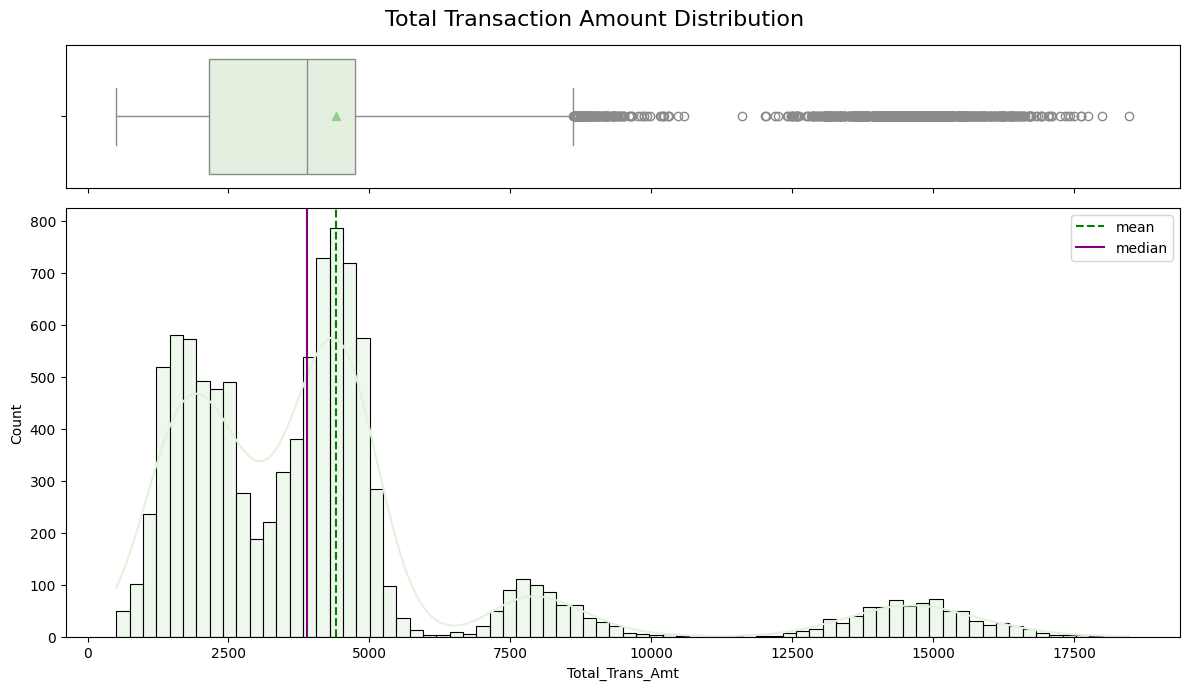

In [22]:
histogram_boxplot(data=df, feature='Total_Trans_Amt', figsize=(12, 7), kde=True, plot_title='Total Transaction Amount Distribution')

<div class='observation_text'>Observation:</div>

1. The distribution is right-skewed, with the median lower than the mean, and it contains many outliers.
2. Most customers have transaction amounts below 5000, but some spent as much as 175k dollars in the past 12 months.
3. There’s a bimodal distribution, suggesting two distinct customer groups with different transaction behaviors.

<div class='ans_text'>Ans2. distribution of the level of education of customers</div>

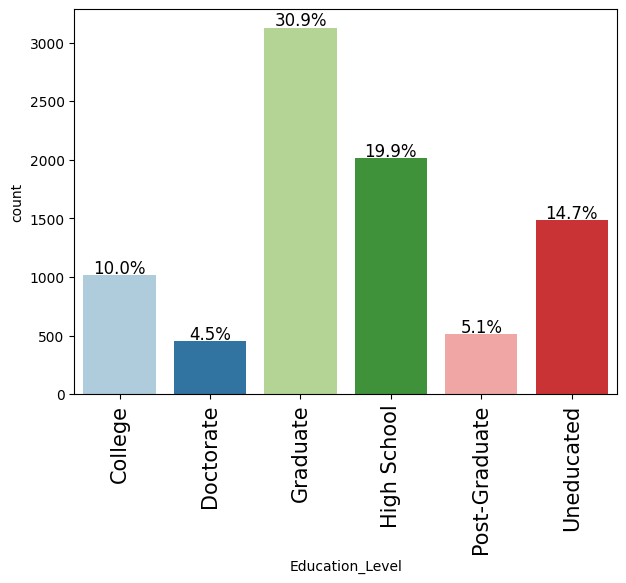

In [23]:
labeled_barplot(data=df, feature='Education_Level', perc=True, n=None)

<div class='observation_text'>Observation:</div>

1. Most customers have a graduate-level education, followed by high school graduates and those without formal education.
2. The bank has the fewest customers with post-graduate or doctorate-level education.

<div class='ans_text'>Ans3. distribution of the level of income of customers</div>

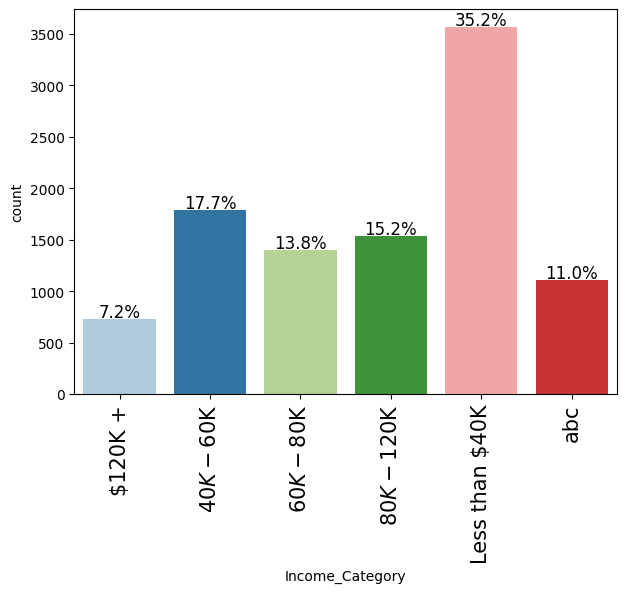

In [24]:
labeled_barplot(data=df, feature='Income_Category', perc=True, n=None)

<div class='observation_text'>Observation:</div>

1. Most of the bank’s customers earn less than 40k dollars, followed by those earning between 40k and 60k dollars.
2. Customers earning over 120k are the fewest.
3. The income of 11% of customers is unknown.

<div class='ans_text'>Ans4. How does the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)?</div>

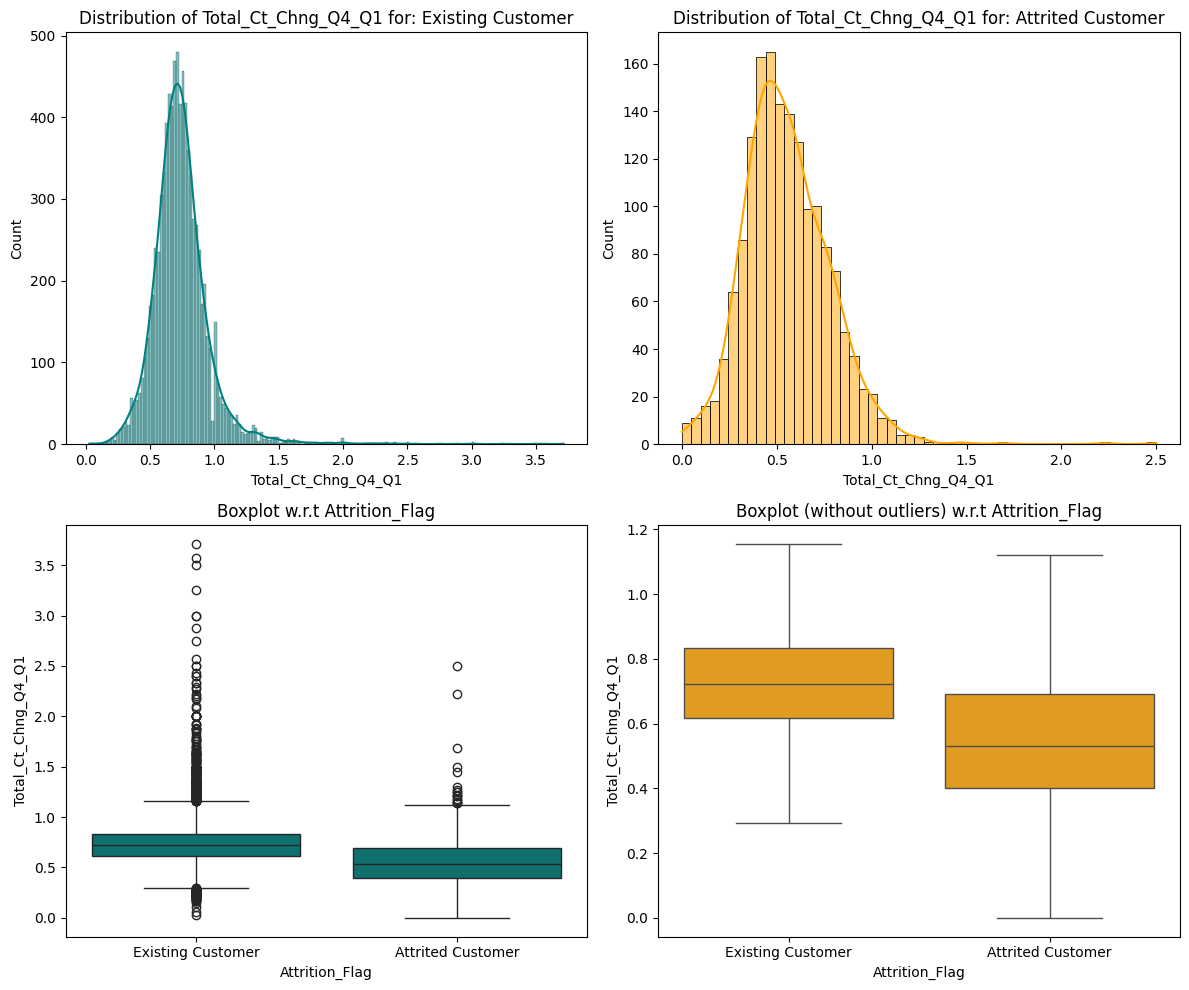

In [25]:
distribution_plot_wrt_target(data = df, predictor = 'Total_Ct_Chng_Q4_Q1', target = 'Attrition_Flag')

<div class='observation_text'>Observation:</div>

1. The Total_Ct_Chng_Q4_Q1 column shows the ratio of total transaction counts between the 4th and 1st quarters.
2. Both attrited and existing customers have a similar distribution shape for this ratio. However, the median and IQR are higher for existing customers, indicating that attrited customers had fewer transactions in the 4th quarter compared to the 1st. This suggests that a decline in transaction activity may indicate a customer is at risk of leaving.

<div class='ans_text'>Ans5. How does the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)?</div>

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
All                                  1627               8500  10127
3                                     826               3020   3846
2                                     505               2777   3282
4                                     130                305    435
1                                     100               2133   2233
5                                      32                146    178
6                                      19                105    124
0                                      15                 14     29
------------------------------------------------------------------------------------------------------------------------


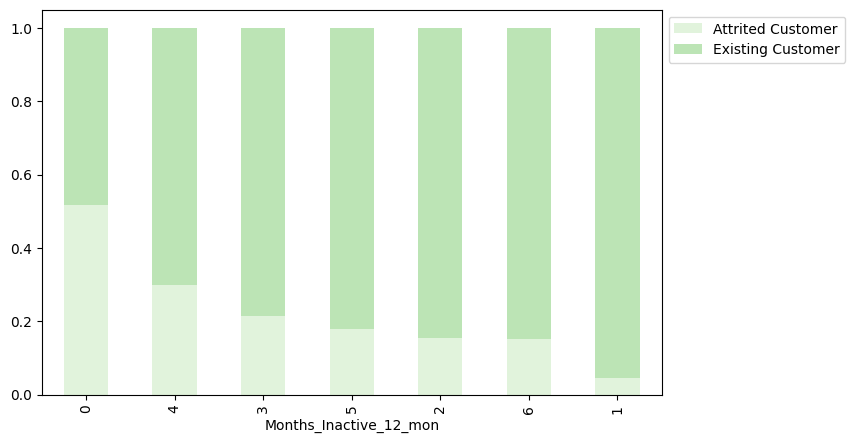

In [26]:
stacked_barplot(data = df, predictor = 'Months_Inactive_12_mon', target = 'Attrition_Flag')

<div class='observation_text'>Observation:</div>

1. The number of active customers is higher for attrited customers (15) than for existing customers (10), even though the total number of attrited customers is much lower. Which means 15 customers who left bank were active still left the bank.
2. In absolute numbers, most attrited customers were inactive for 3 months, followed by 2 and 4 months. However, ratio wise, more attrited customers were inactive for 4 months.
3. The pattern appears random and does not provide much insight into the target variable.

<div class='ans_text'>Ans6. What are the attributes that have a strong correlation with each other?</div>

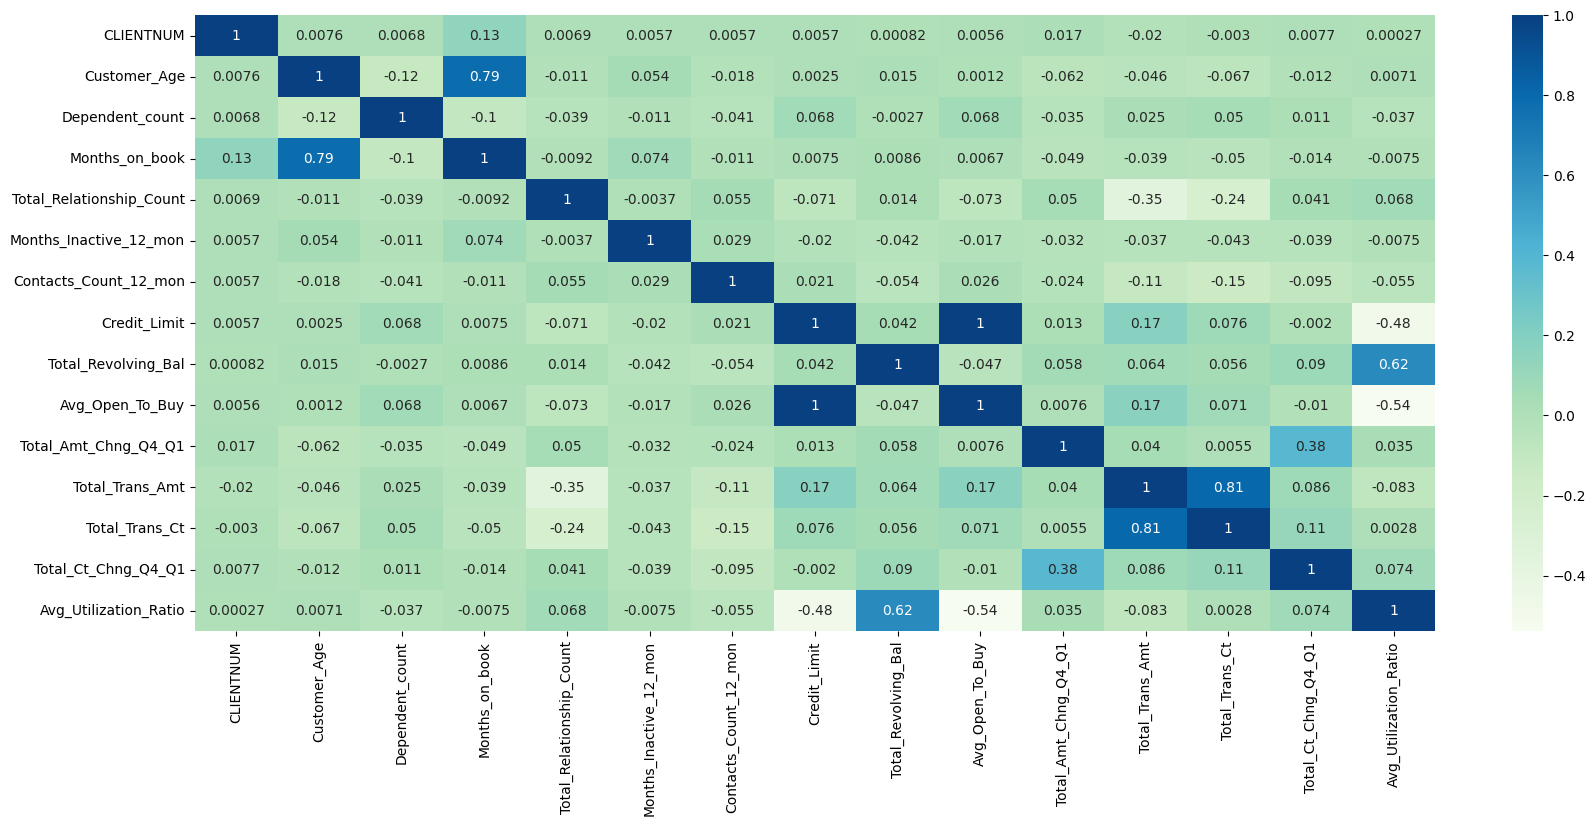

In [27]:
correlation_matrix=df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(20,8))
sns.heatmap(data=correlation_matrix,annot=True, cmap="GnBu")
plt.show()

<div class='observation_text'>Observation:</div>

1. Credit Limit and Avg_Open_To_Buy are highly correlated. Since Avg_Open_To_Buy represents the average amount left on the credit card over the last 12 months, this correlation makes sense. I plan to create a new feature using these two through feature engineering.
2. Total Transaction Amount and Total Transaction Count (both over the last 12 months) are also highly correlated. We could create a new feature to calculate the average transaction amount per transaction. However, since the correlation is less than 0.9, we will use both features in our models for now. If performance doesn’t improve, we can try to create a new feature and check the performance.
3. Months_on_book and Customer_Age are also highly correlated.

<div class='custom_header'>Bi-Variate Analysis:</div> Other Columns vs Target column

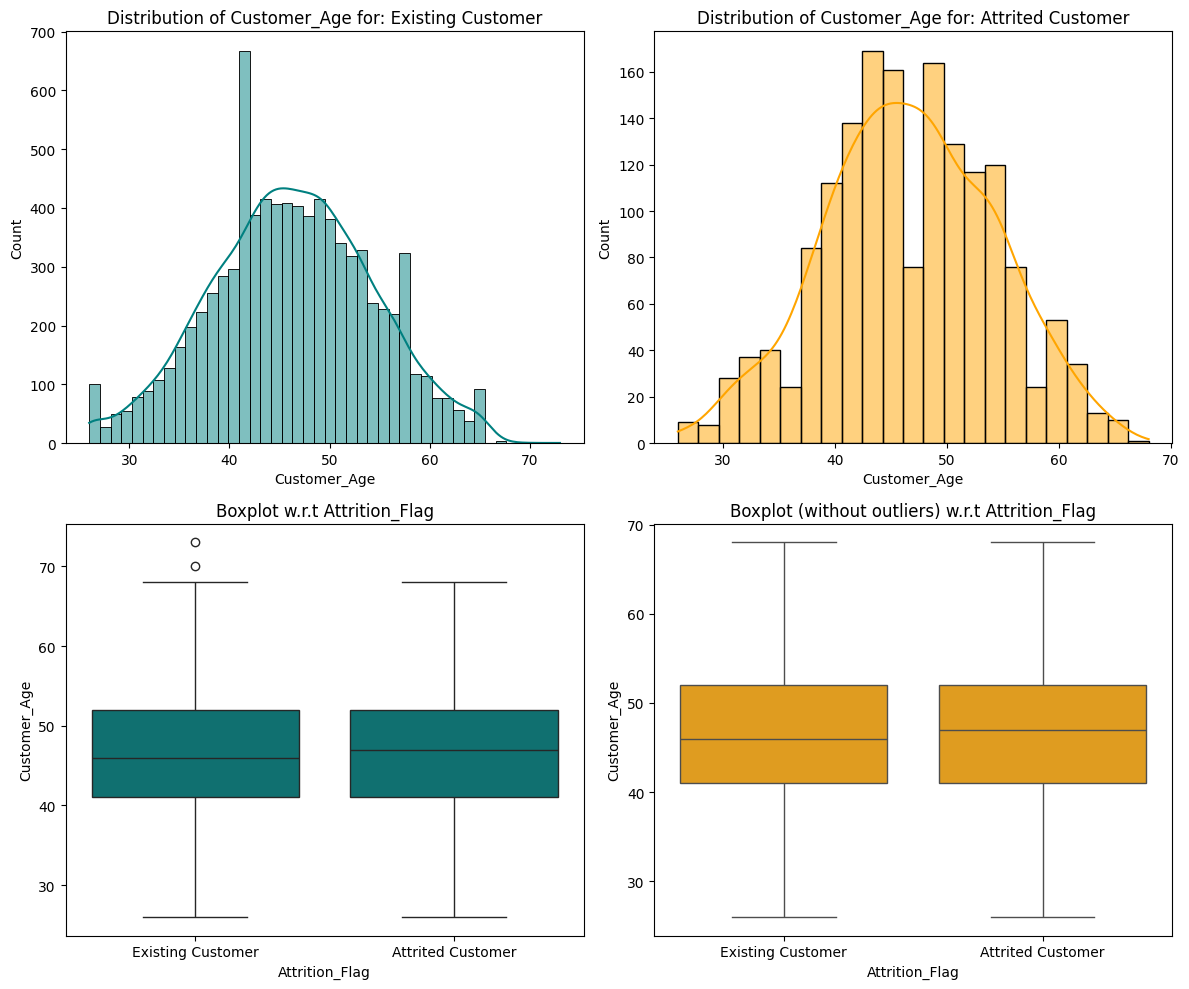

In [28]:
distribution_plot_wrt_target(data=df, predictor="Customer_Age", target="Attrition_Flag")

<div class='observation_text'>Observation:</div>

1. The median age of attrited customers is slightly higher than that of existing customers, though the IQR is nearly the same.
2. While this feature alone cannot predict customer churn, it might provide useful insights when combined with other features to determine if a customer is likely to leave the bank.

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


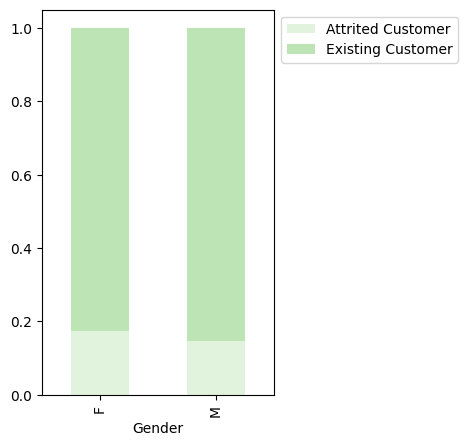

In [29]:
stacked_barplot(data=df, predictor="Gender", target="Attrition_Flag")

<div class='observation_text'>Observation:</div>

1. We can see that, proportionally, more female customers have attrited compared to male customers, though the difference is not very large.

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
------------------------------------------------------------------------------------------------------------------------


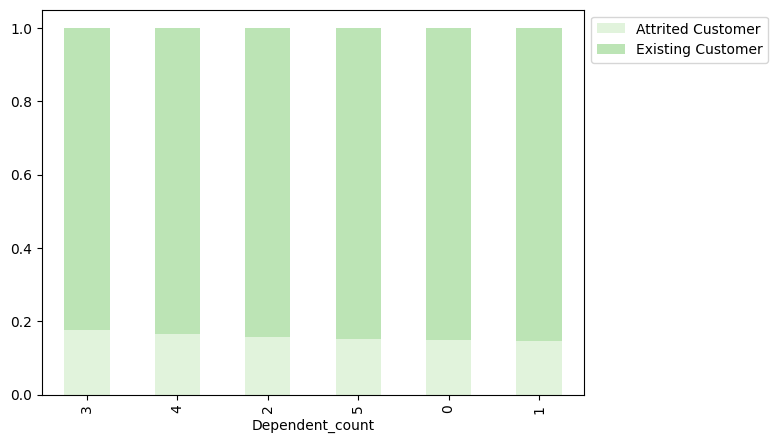

In [30]:
stacked_barplot(data=df, predictor="Dependent_count", target="Attrition_Flag")

<div class='observation_text'>Observation:</div>

1. Similar to gender, the number of dependents doesn’t show much difference between attrited and existing customers. However, for customers with 3 dependents, ratio wise attrition is higher. To determine if there’s a relationship between the number of dependents and customer attrition, we need to analyze more data.

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


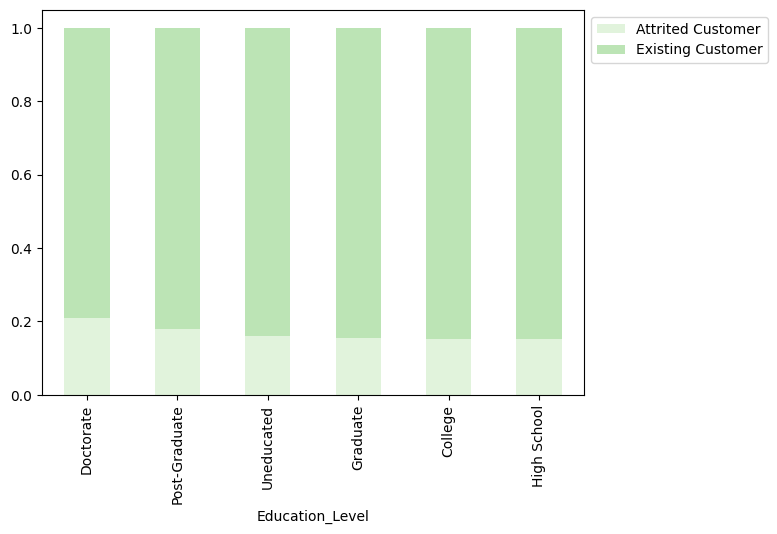

In [31]:
stacked_barplot(data=df, predictor="Education_Level", target="Attrition_Flag")

<div class='observation_text'>Observation:</div>

1. The attrition rate is higher for customers with Doctorate and Post Graduate degrees, followed by those with no formal education. While there may be a pattern, it is not very clear, and more data and analysis are needed to confirm this.

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


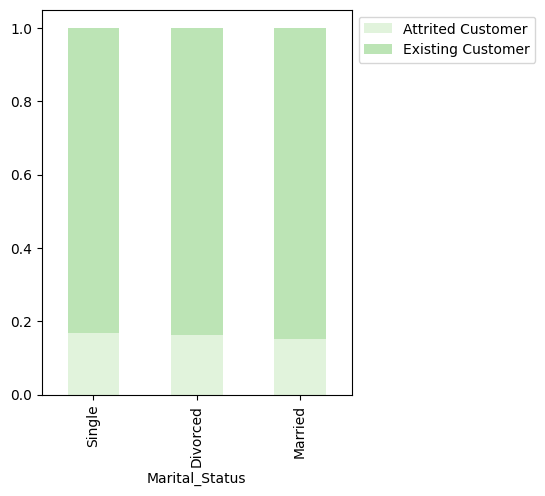

In [32]:
stacked_barplot(data=df, predictor="Marital_Status", target="Attrition_Flag")

<div class='observation_text'>Observation:</div>

1. In the very low margin group, single customers have slightly higher attrition rates compared to divorced and married customers, though the difference is not very clear.

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


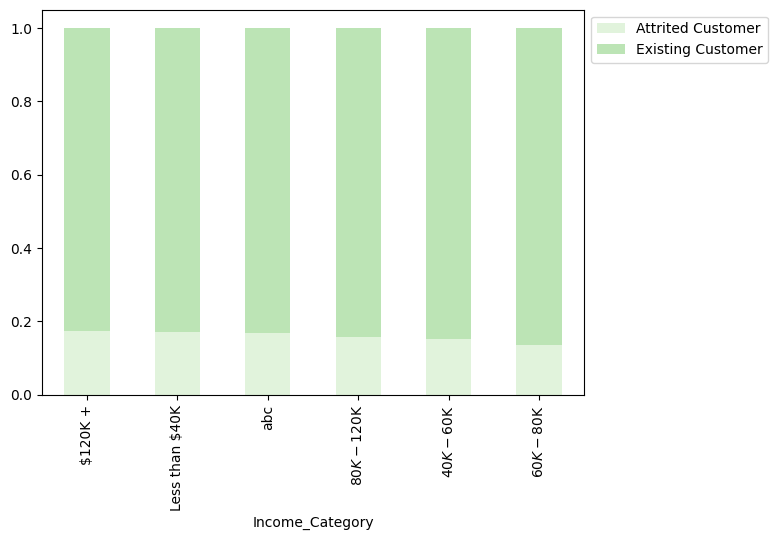

In [33]:
stacked_barplot(data=df, predictor="Income_Category", target="Attrition_Flag")

<div class='observation_text'>Observation:</div>

1. Attrition is highest among high-income individuals, followed by the lowest income bracket. Therefore, generalizing this pattern would not be accurate.

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


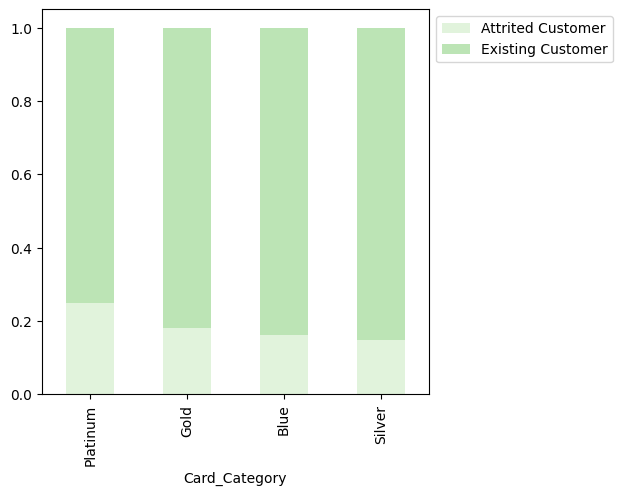

In [34]:
stacked_barplot(data=df, predictor="Card_Category", target="Attrition_Flag")

<div class='observation_text'>Observation:</div>

1. Platinum cardholders have a higher likelihood of leaving the bank compared to other cardholders. However, since very few customers have a Platinum card, we need more data to confirm this observation.
2. The chances of attrition are lowest for Silver cardholders.

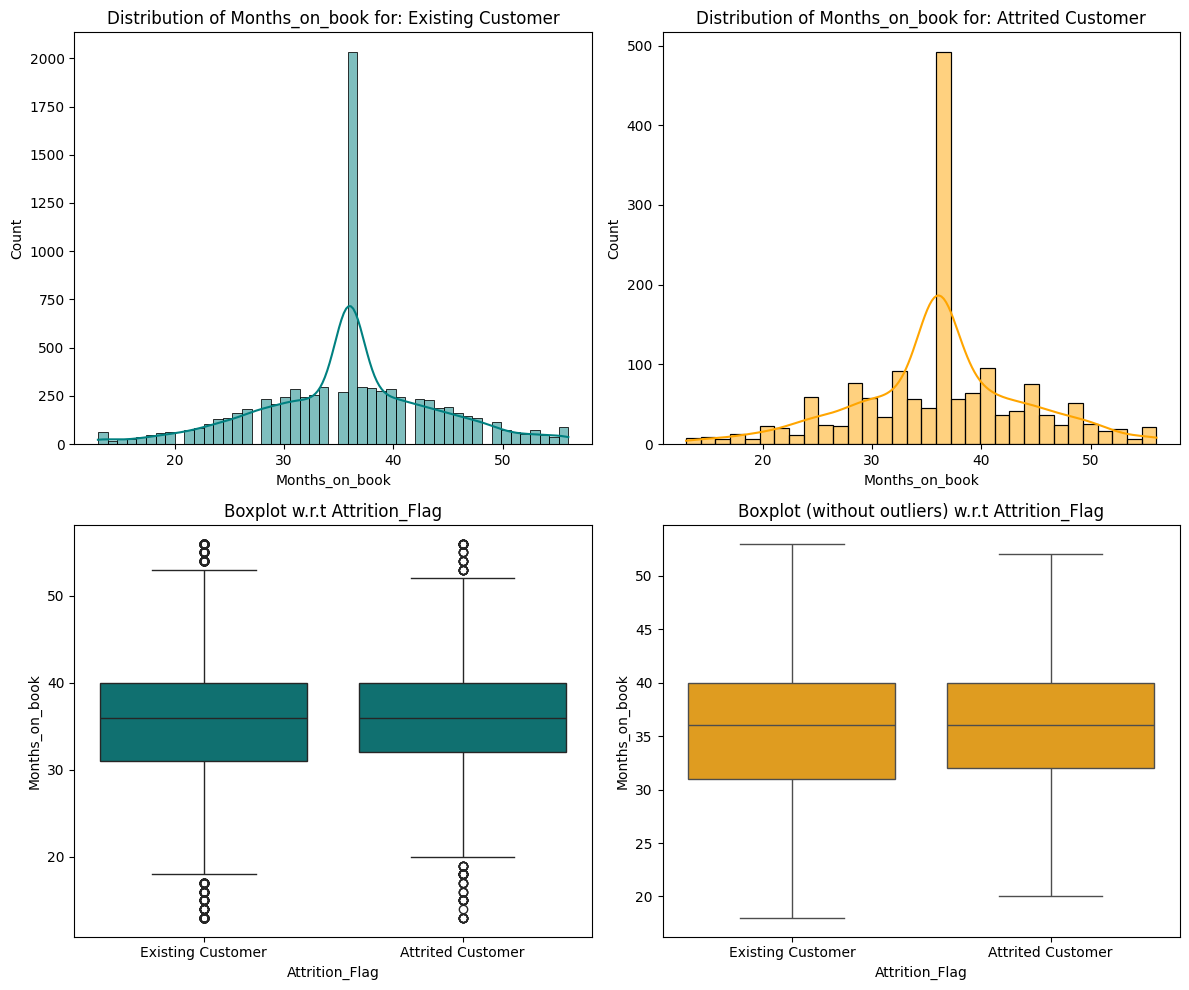

In [35]:
distribution_plot_wrt_target(data=df, predictor="Months_on_book", target="Attrition_Flag")

<div class='observation_text'>Observation:</div>

1. The distributions are nearly identical, with similar medians and IQRs for both groups.
2. Churn does not appear to be strongly correlated with the duration (Months_on_book) alone.

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
All                                    1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866
------------------------------------------------------------------------------------------------------------------------


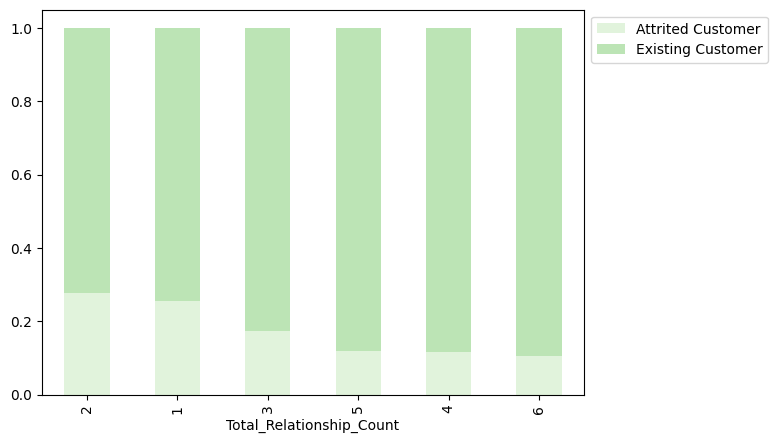

In [36]:
stacked_barplot(data=df, predictor="Total_Relationship_Count", target="Attrition_Flag")

<div class='observation_text'>Observation:</div>

1. We can observe that when the number of products held by a customer is low (2, 1 and 3), the chances of attrition is higher.

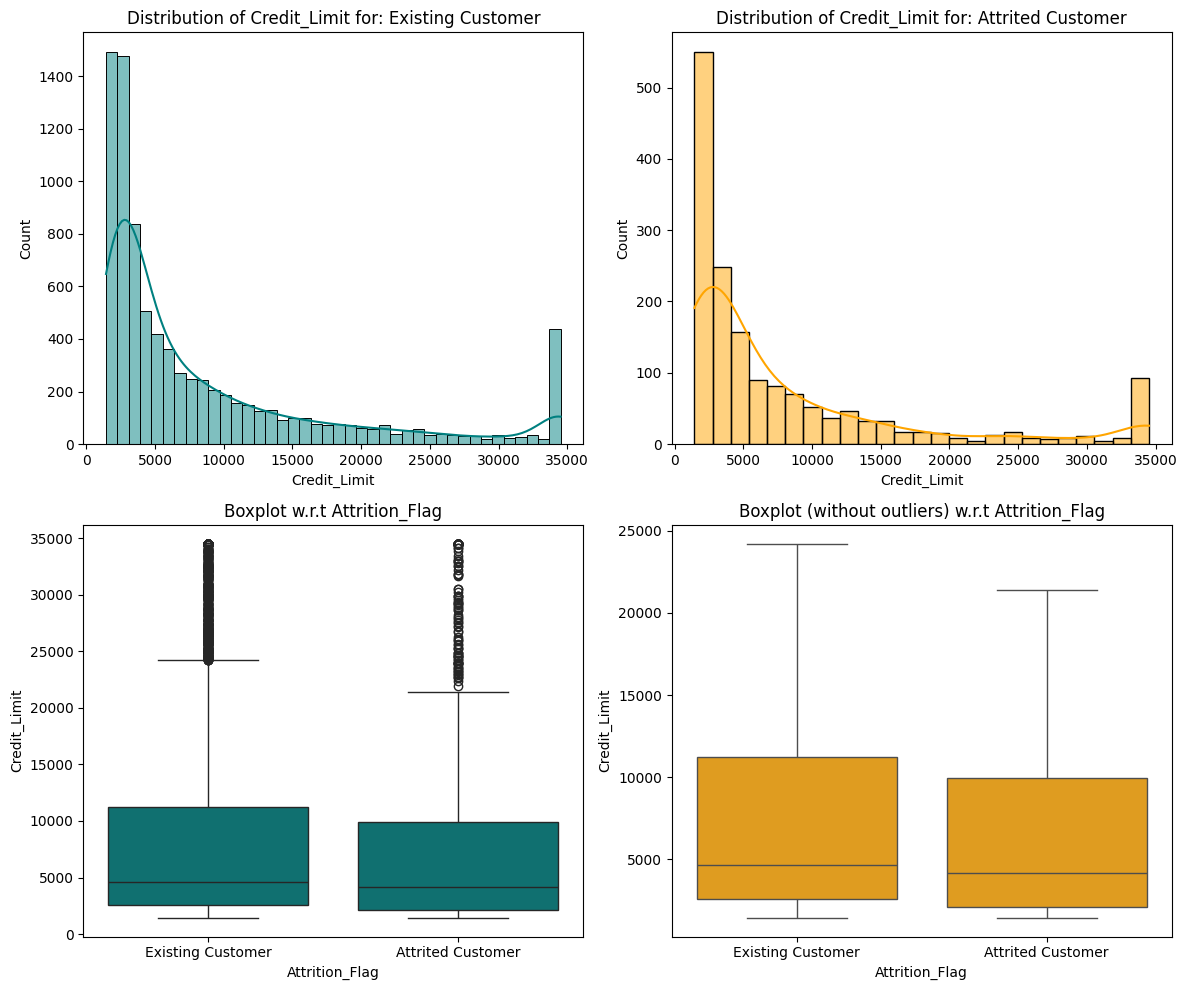

In [37]:
distribution_plot_wrt_target(data=df, predictor="Credit_Limit", target="Attrition_Flag")

<div class='observation_text'>Observation:</div>

1. The shape of the distribution and the mean are very similar for both customer groups, so this feature alone may not be very useful in predicting the outcome.

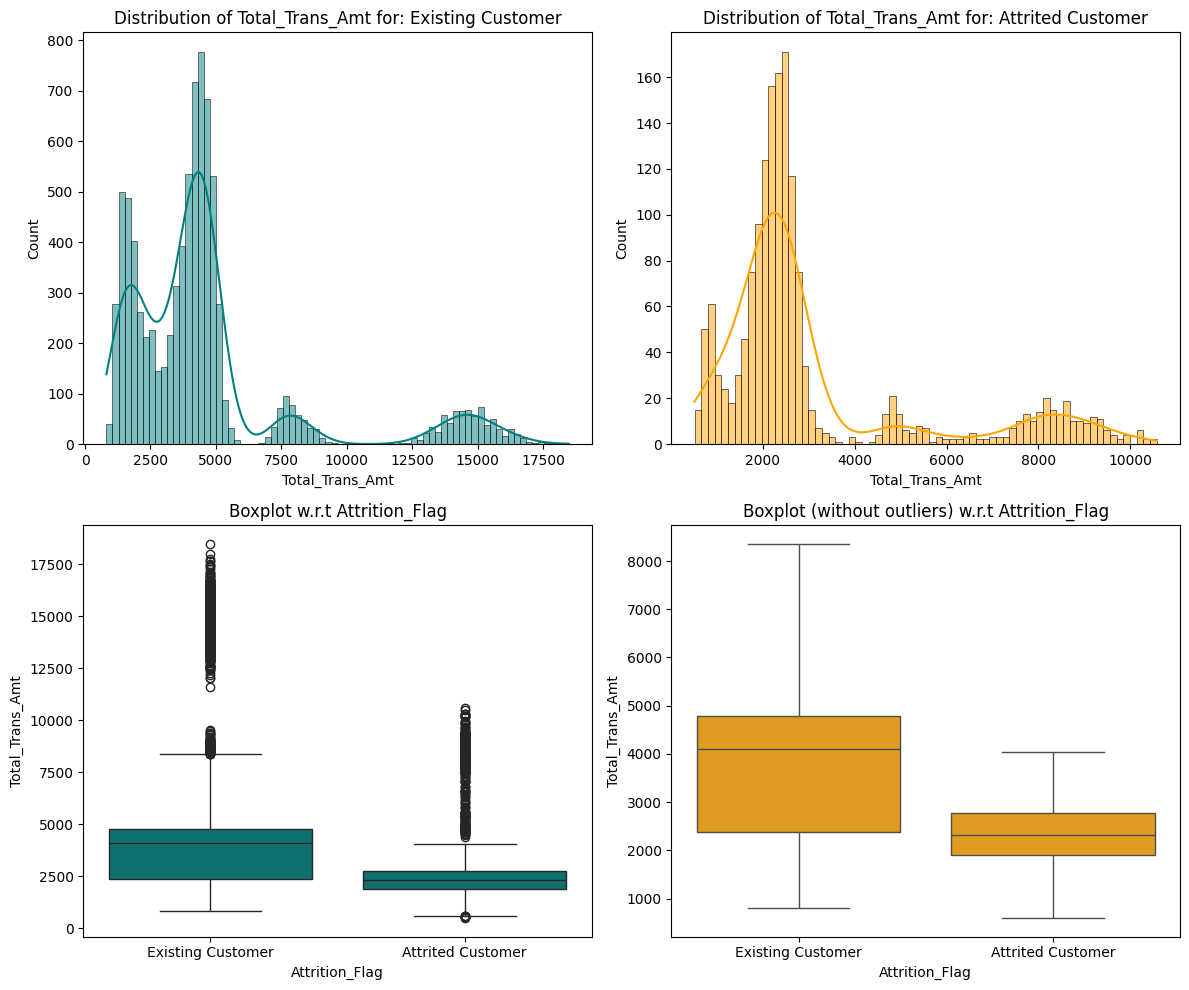

In [38]:
distribution_plot_wrt_target(data=df, predictor="Total_Trans_Amt", target="Attrition_Flag")

<div class='observation_text'>Observation:</div>

1. The IQR for existing customers is broader than for attrited customers.
2. Attrited customers show a lower median and a narrower IQR, suggesting more consistent transaction amounts, but significantly lower than those of existing customers.
3. Low Total_Trans_Amt and lack of high-value transactions could be potential indicators of customer churn.

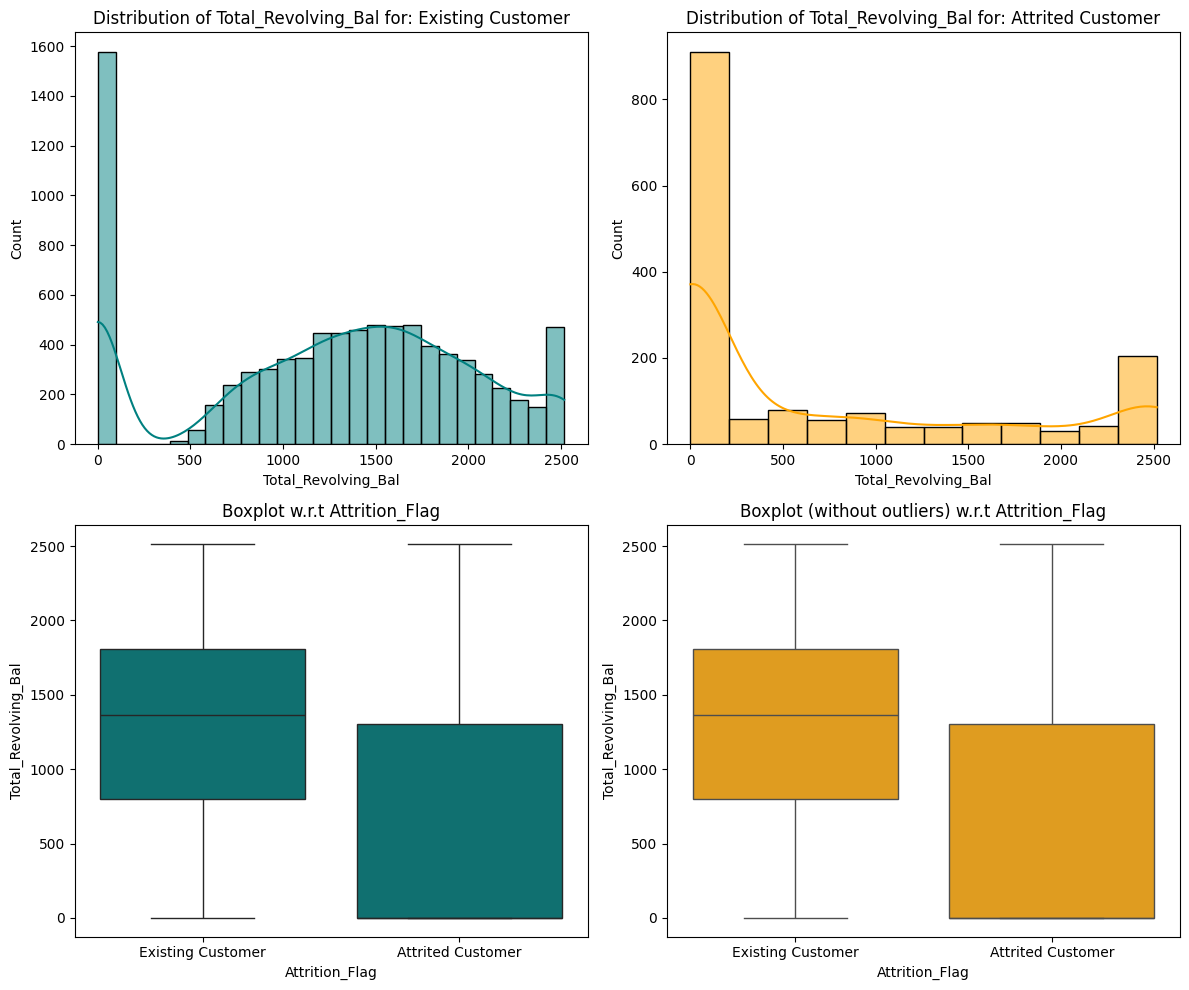

In [39]:
distribution_plot_wrt_target(data=df, predictor="Total_Revolving_Bal", target="Attrition_Flag")

<div class='observation_text'>Observation:</div>

1. The distribution of Total Revolving Balance is clearly different for existing and attrited customers. 
2. The median value is zero for attrited customers, while it is much higher for existing customers, suggesting that this feature could help predict customer churn.

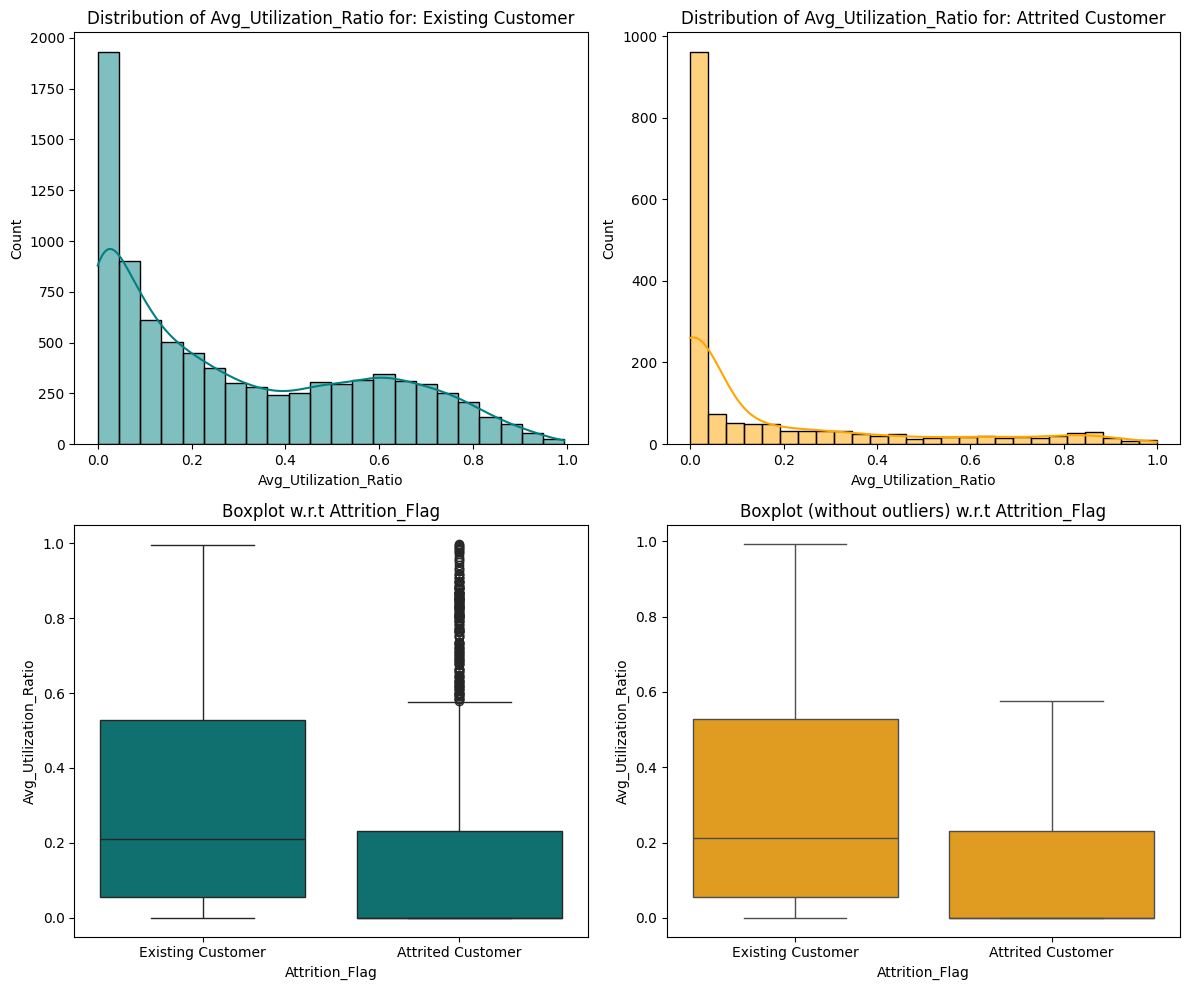

In [40]:
distribution_plot_wrt_target(data=df, predictor="Avg_Utilization_Ratio", target="Attrition_Flag")

<div class='observation_text'>Observation:</div>

1. Existing customers generally have higher utilization ratios compared to attrited customers.
2. Attrited customers have a lower median utilization ratio, suggesting they use less of their available credit.
3. There are many outliers in existing customers, indicating some customers with very high utilization.
4. Low utilization ratios could be a signal of potential attrition.
5. Customers with consistently low utilization might be at risk of churning.

<div class='custom_header'>MultiVariate Analysis: Pair Plot</div>

<Figure size 4000x800 with 0 Axes>

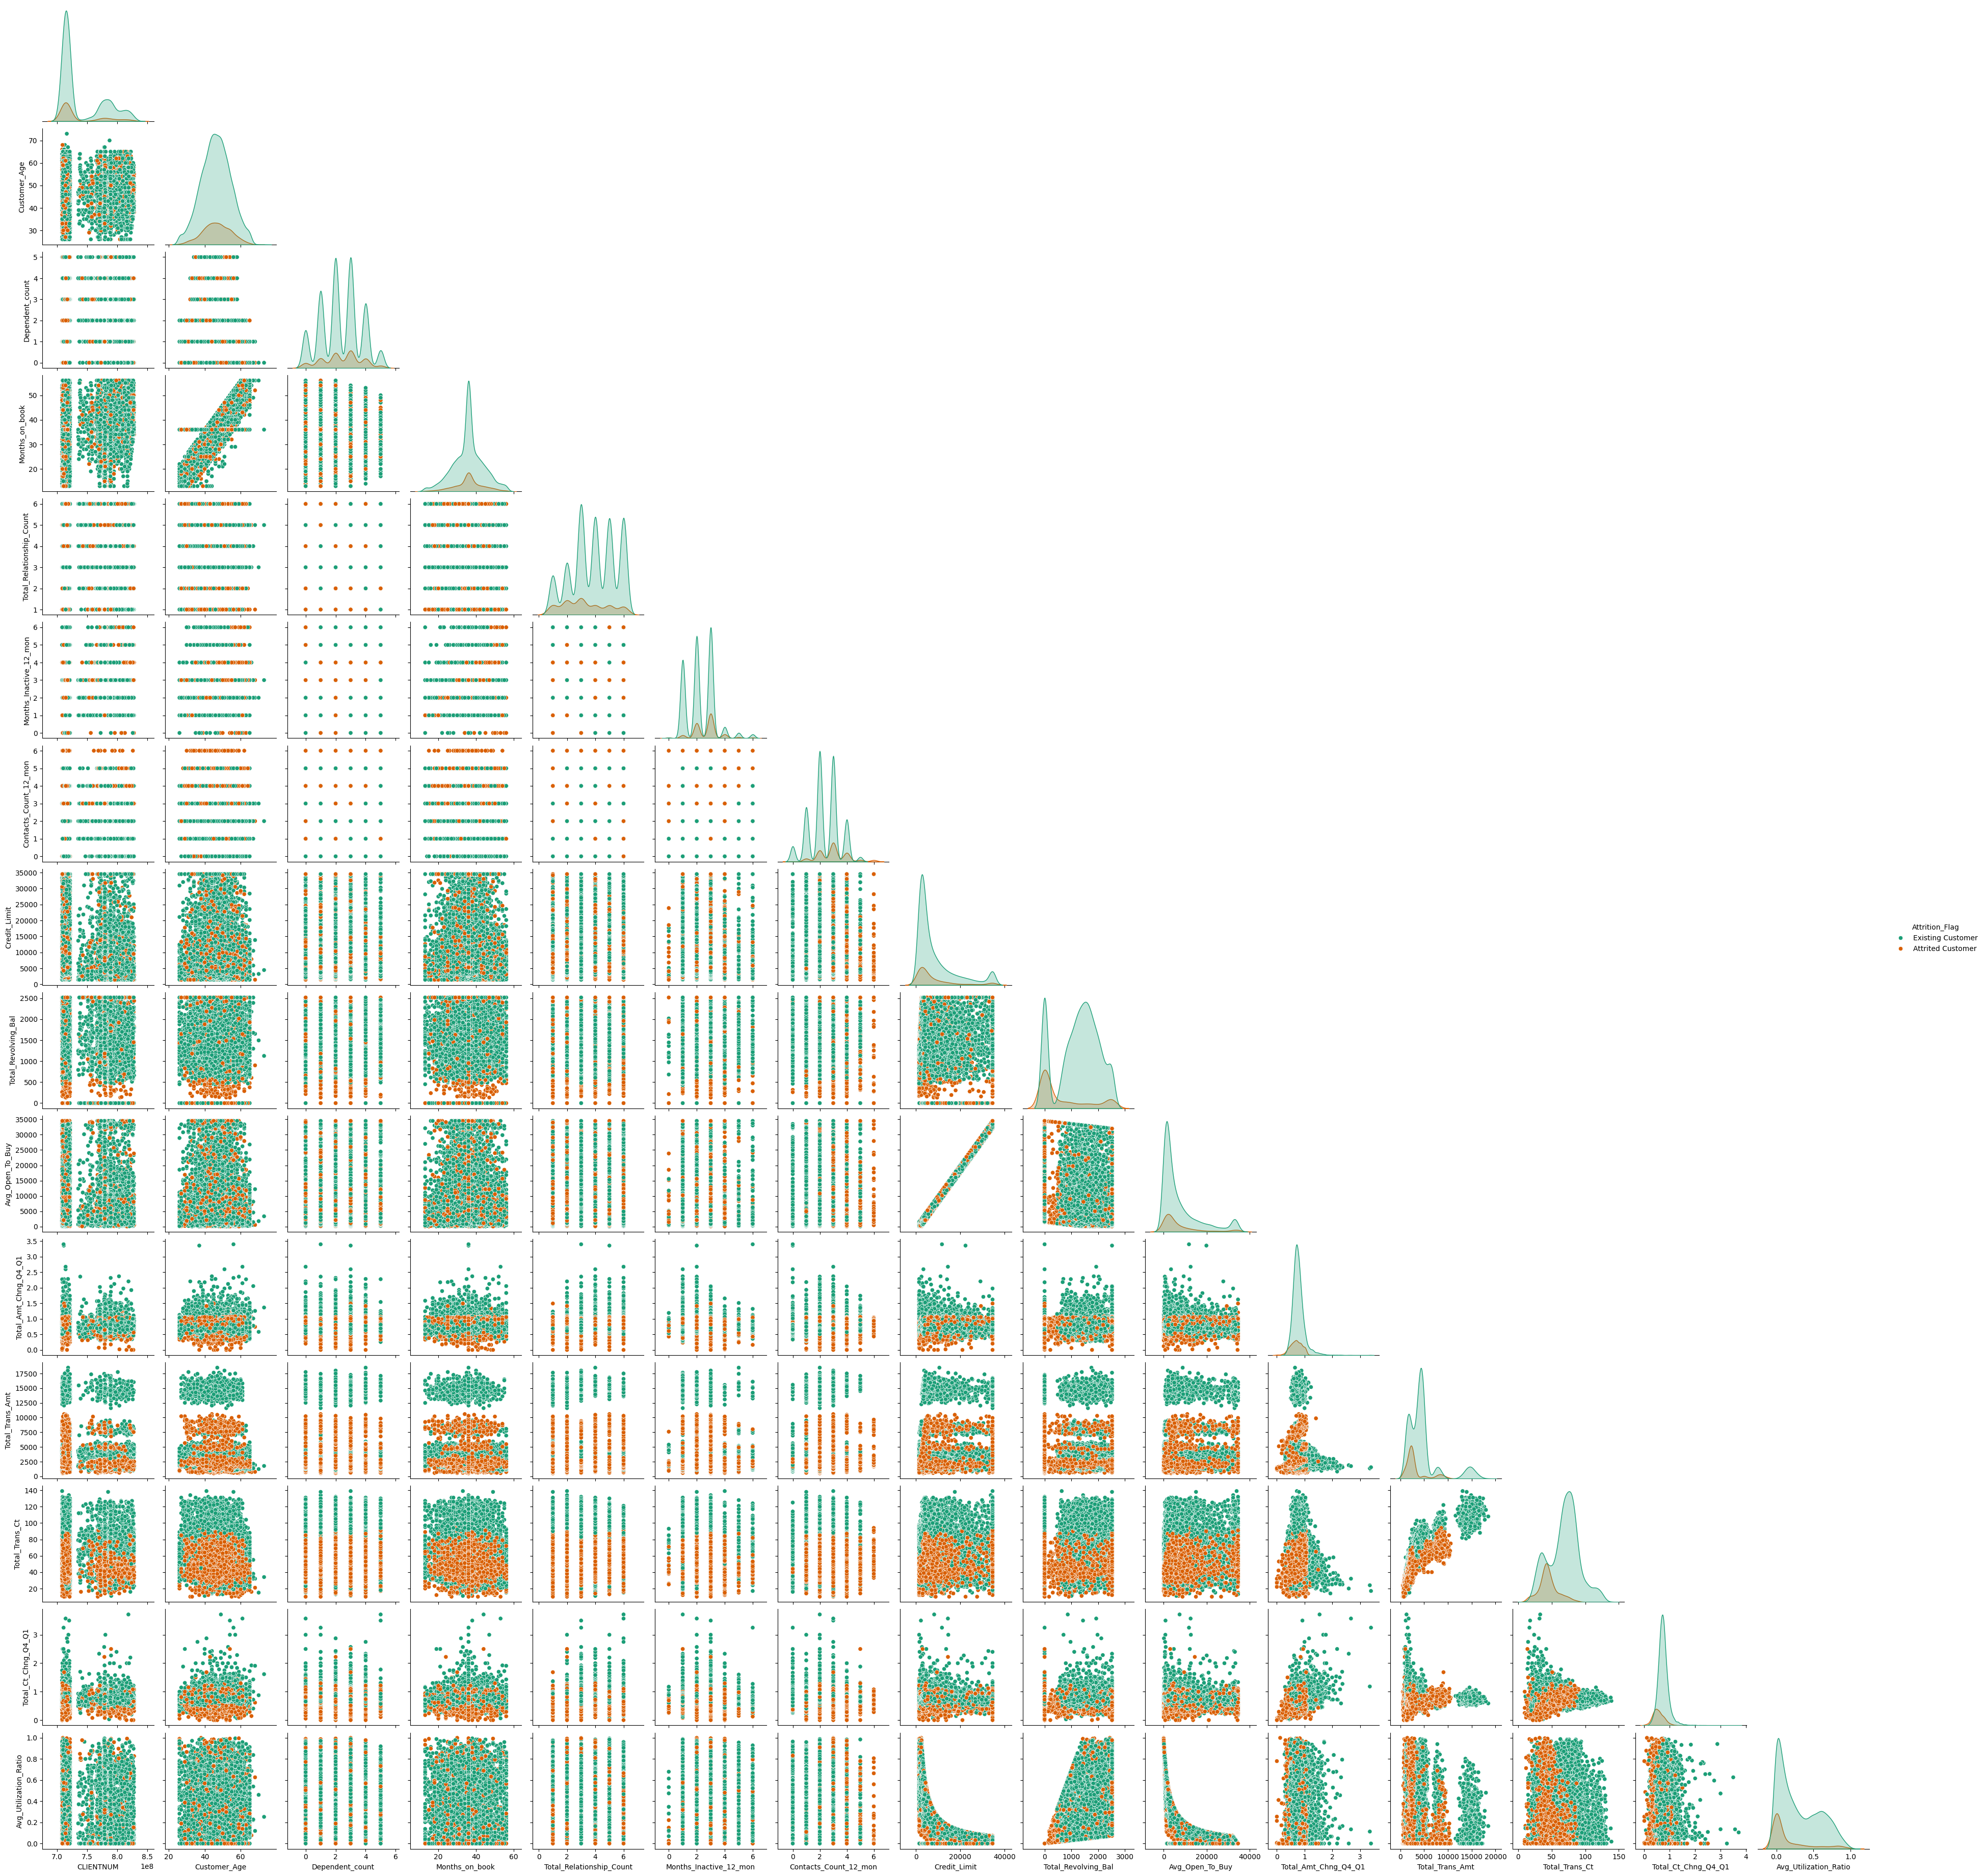

In [41]:
plt.figure(figsize=(40,8))
sns.pairplot(df, corner=True, hue="Attrition_Flag",palette="Dark2")
plt.show();

<div class='observation_text'>Observation:</div>

From Pair plot we can observe similar kind of information we got from heat map and bivariate analysis.

<div class='custom_header'>Overall Observation</div>

- Based on the plots, the below fields could be good predictors for customer attrition
    - Total_Trans_Amt
    - Total_Relationship_Count
    - Total_Ct_Chng_Q4_Q1
    - Avg_Utilization_Ratio
    - Total_Revolving_Bal
    - Card_Category
    
- As per heatmap, we will perform feature engineering on "Avg_Open_To_Buy" and "Credit_Limit" and after creating new features we will drop these two columns.

## Data Pre-processing

<div class='custom_header'>Feature Engineering</div>

In [42]:
df['Credit_Utilization_Ratio']=df['Avg_Open_To_Buy']/df['Credit_Limit']

<div class='custom_header'>Drop unnecessary Columns</div>

In [43]:
columns_to_drop=['CLIENTNUM','Avg_Open_To_Buy','Credit_Limit']
df.drop(columns_to_drop,inplace=True,axis=1)

<div class='custom_header'>Missing value imputation</div>

Missing value imputation should be done after splitting the data into train, validation, and test sets. Imputing after splitting ensures that information from the validation or test set does not leak into the training set, which could artificially boost performance. However, if missing values are replaced with a fixed value, this can be done before splitting because it doesn’t rely on the data distribution.

In [44]:
df.Marital_Status.fillna("Unknown",inplace=True)
df.Education_Level.fillna("Unknown",inplace=True)
df.Income_Category.replace('abc',"Unknown",inplace=True)

<div class='custom_header'>Categorical to Numeric conversion</div>

<div class='ans_text'>Ordinal Encoding:</div> 
- Education level,Card Category and Income Category has a order, so we will use ordinal encoding for these three feature.

In [45]:
education_mapping = {'Uneducated':0,'Unknown':1,'High School':2,'College':3,'Graduate':4,'Post-Graduate':5,'Doctorate':6}
income_mapping= {'Less than $40K':0, 'Unknown':1, '$40K - $60K':2,'$60K - $80K':3, '$80K - $120K':4, '$120K +':5}
card_mapping = {'Blue':0, 'Silver':1, 'Gold':2, 'Platinum':3}

df['Education_Level']=df['Education_Level'].map(education_mapping).astype(int)
df['Income_Category']=df['Income_Category'].map(income_mapping).astype(int)
df['Card_Category']=df['Card_Category'].map(card_mapping).astype(int)

<div class='ans_text'>Target Feature Convert:</div> Target Feature i.e. "Attrition_Flag" should have numeric values, we will use 1 for positive i.e. attrited customers and 0 for negative aka existing customer.

In [46]:
attrition_flag_mapping = {'Existing Customer':0, 'Attrited Customer':1}
df['Attrition_Flag']=df['Attrition_Flag'].map(attrition_flag_mapping).astype(int)

After converting the “Attrition Flag” to a numeric column and performing feature engineering, we can analyze the correlation matrix again, it might give us more details.

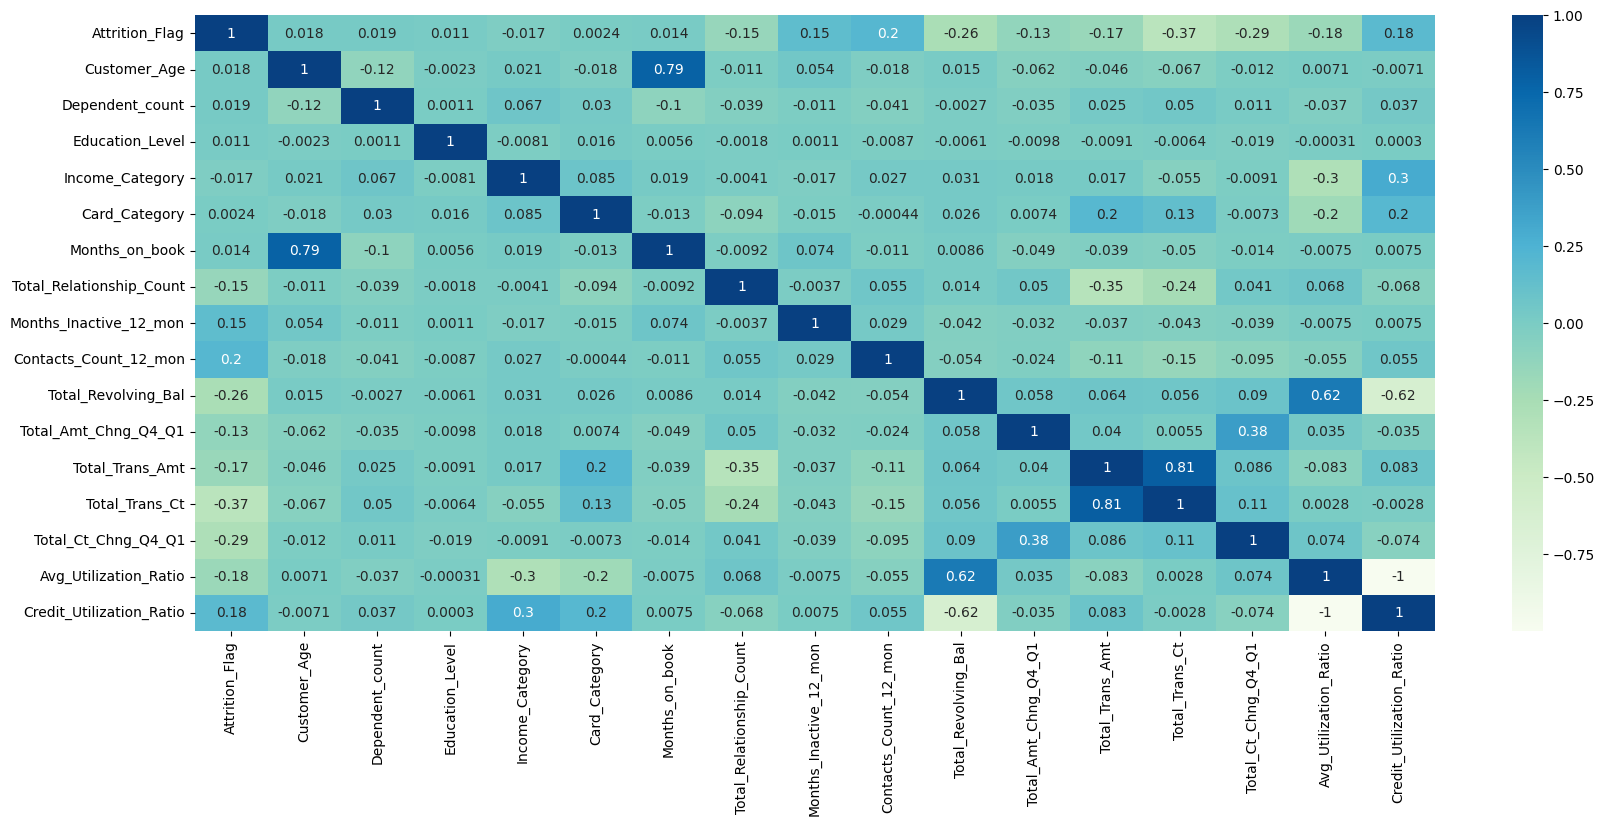

In [47]:
correlation_matrix=df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(20,8))
sns.heatmap(data=correlation_matrix,annot=True, cmap="GnBu")
plt.show()

<div class='observation_text'>Observation:</div>

- The Attrition_Flag is negatively correlated with Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, and Total_Revolving_Bal.
- Although none of these features show a strong individual correlation, they may collectively contribute to better predictions when used together in a model.

<div class='ans_text'>One Hot Encoding:</div> 
- Gender, Marital Status does not have any particular order so we will use one hot encoding here.

In [48]:
df=pd.get_dummies(df,drop_first=True)

In [49]:
df.sample(2)

Attrition_Flag  Customer_Age  Dependent_count  Education_Level  \
8947               0            43                4                2   
7764               0            38                2                5   

      Income_Category  Card_Category  Months_on_book  \
8947                2              0              35   
7764                2              0              28   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
8947                         1                       1                      1   
7764                         2                       1                      1   

      ...  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
8947  ...                 0.620             7801              74   
7764  ...                 0.706             4690              79   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Credit_Utilization_Ratio  \
8947                0.644                  0.731                  0.268739   
7764                0.756                  0.536                  0.463966   

      Gender_M  Marital_Status_Married  Marital_Status_Single  \
8947      True                    True                  False   
7764     False                    True                  False   

      Marital_Status_Unknown  
8947                   False  
7764                   False  

[2 rows x 21 columns]

## Model Building

### Model evaluation criterion

To identify customers who may churn, we will use metric like recall, precision, as our data is imbalanced. For balanced data, we could also use the ROC-AUC curve along with other metrics.

**Which metric to optimize?**

* If a customer leaves the bank, the bank loses business, so predicting true positives (correctly identifying customers who will churn) is very important. However, if the model incorrectly predicts a customer will churn, marketing costs could increase. So, we need to carefully choose the right metric.
* According to the assignment, "You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards" so our job  is to improve recall as it ensures we identify as many potential churners as possible, even if it means reaching out to some customers who might not churn.
* So our final metric will be Recall.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [50]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, pred, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: predicted value
    target: real value
    """

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

**Let's define a function to output different model's performance without Hyperparameter Tuning.**

In [51]:
def model_performance_with_out_hp_tuning(X_train_data,y_train_data):
    models = []  # Empty list to store all the models

    # Appending models into the list
    models.append(("Decision Tree", DecisionTreeClassifier(random_state=rn)))
    models.append(("Bagging", BaggingClassifier(random_state=rn)))
    models.append(("Random forest", RandomForestClassifier(random_state=rn)))
    models.append(("Ada Boost", AdaBoostClassifier(random_state=rn)))
    models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=rn)))
    models.append(("Extreme Gradient Boosting", XGBClassifier(random_state=rn)))

    print("\n" "Training Performance using Recall Score:" "\n")
    for name, model in models:
        model.fit(X_train_data, y_train_data)
        scores = recall_score(y_train_data, model.predict(X_train_data))
        print("{}: {}".format(name, scores))

    print("\n" "Validation Performance using Recall Score:" "\n")

    for name, model in models:
        model.fit(X_train_data, y_train_data)
        scores_val = recall_score(y_val, model.predict(X_val))
        print("{}: {}".format(name, scores_val))

### Model Building with original data

In [52]:
X=df.drop(['Attrition_Flag'],axis=1)
y=df['Attrition_Flag']

In [53]:
# Splitting data into training, validation and testing set:
X_train, X_temp, y_train, y_temp = train_test_split(X,y,train_size=0.6,random_state=rn, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp,y_temp,train_size=0.5,random_state=rn, stratify=y_temp)
print(X_train.shape, X_val.shape, X_test.shape)

(6076, 20) (2026, 20) (2025, 20)


In [54]:
print("Base Data:")
model_performance_with_out_hp_tuning(X_train,y_train)

Base Data:

Training Performance using Recall Score:

Decision Tree: 1.0
Bagging: 0.9702868852459017
Random forest: 1.0
Ada Boost: 0.7387295081967213
Gradient Boosting: 0.9006147540983607
Extreme Gradient Boosting: 1.0

Validation Performance using Recall Score:

Decision Tree: 0.8098159509202454
Bagging: 0.7944785276073619
Random forest: 0.7975460122699386
Ada Boost: 0.7423312883435583
Gradient Boosting: 0.8159509202453987
Extreme Gradient Boosting: 0.8773006134969326


<div class='observation_text'>Observation:</div>

Without any over/undersampling or hyperparameter tuning, AdaBoost shows the best performance. It generalizes the data better and does not overfit. While other models perform better on the training set, their performance drops sharply on the validation set, unlike AdaBoost. This indicates that AdaBoost maintains consistency and handles unseen data more effectively.

### Model Building with Oversampled data


In [55]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=rn)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [56]:
print("Oversampled Data:")
model_performance_with_out_hp_tuning(X_train_over,y_train_over)

Oversampled Data:

Training Performance using Recall Score:

Decision Tree: 1.0
Bagging: 0.9978431372549019
Random forest: 1.0
Ada Boost: 0.9574509803921568
Gradient Boosting: 0.9829411764705882
Extreme Gradient Boosting: 1.0

Validation Performance using Recall Score:

Decision Tree: 0.8006134969325154
Bagging: 0.852760736196319
Random forest: 0.8773006134969326
Ada Boost: 0.8865030674846626
Gradient Boosting: 0.8865030674846626
Extreme Gradient Boosting: 0.901840490797546


<div class='observation_text'>Observation:</div>

For all the models, the performance is very high on the training set but drops sharply on the validation set. If we have to choose a model, AdaBoost is the best option because it generalizes better than the others, showing more consistent performance on unseen data.

### Model Building with Undersampled data

In [57]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=rn, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [58]:
print("Undersampled Data:")
model_performance_with_out_hp_tuning(X_train_un,y_train_un)

Undersampled Data:

Training Performance using Recall Score:

Decision Tree: 1.0
Bagging: 0.9969262295081968
Random forest: 1.0
Ada Boost: 0.9375
Gradient Boosting: 0.9825819672131147
Extreme Gradient Boosting: 1.0

Validation Performance using Recall Score:

Decision Tree: 0.8987730061349694
Bagging: 0.901840490797546
Random forest: 0.9294478527607362
Ada Boost: 0.9171779141104295
Gradient Boosting: 0.950920245398773
Extreme Gradient Boosting: 0.9539877300613497


<div class='observation_text'>Observation:</div>

All the boosting models perform well on both the training and validation sets, indicating they are not overfitting and are generalizing the data effectively.

### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


In [59]:
#For Decision Trees:
dt_param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

# For Bagging Classifier:
bagging_param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

# For Random Forest:
random_forest_param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# For Adaboost:
ada_param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=rn),
        DecisionTreeClassifier(max_depth=3, random_state=rn),
    ],
}

#For Gradient Boosting:
gb_param_grid = {
    "init": [AdaBoostClassifier(random_state=rn),DecisionTreeClassifier(random_state=rn)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

#For XGBoost:
xg_param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

In [60]:
scorer = metrics.make_scorer(metrics.recall_score)

When performing hyperparameter tuning, we can start with the best models identified earlier, such as AdaBoost and other boosting models, as they performed the best in our initial evaluations. However, since we only have six models, we will tune all of them to see if their performance improves and if any model stands out after tuning.

In [61]:
def model_performance_after_hyperparameter_tuning(X_train_data,y_train_data):
    models = []  # Empty list to store all the models

    # Appending models into the list
    models.append(("Decision Tree", DecisionTreeClassifier(random_state=rn), dt_param_grid))
    models.append(("Bagging", BaggingClassifier(random_state=rn), bagging_param_grid))
    models.append(("Random forest", RandomForestClassifier(random_state=rn), random_forest_param_grid))
    models.append(("Ada Boost", AdaBoostClassifier(random_state=rn), ada_param_grid))
    models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=rn), gb_param_grid))
    models.append(("Extreme Gradient Boosting", XGBClassifier(random_state=rn), xg_param_grid))
    
    tuned_models=[]

    print("\n" "Hyperparameter Tuning on Training Data:" "\n")
    for name, model, param_grid in models:
        randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=rn)
        randomized_cv.fit(X_train_data,y_train_data)
        print(name,end=':\n\n')
        
        tuned_estimator = randomized_cv.best_estimator_
        tuned_estimator.fit(X_train_data,y_train_data)
        
        training_predictor = tuned_estimator.predict(X_train_data)
        val_predictor = tuned_estimator.predict(X_val)
        
        training_scores = recall_score(y_train_data, training_predictor)
        validation_val = recall_score(y_val, val_predictor)
        
        print("Performance on Training Data: {}: {}".format(name, training_scores))
        print("Performance on Validation Data: {}: {}".format(name, validation_val))
        
        if hasattr(tuned_estimator, 'feature_importances_'):
            importances = tuned_estimator.feature_importances_
            indices = np.argsort(importances)[-5:]
            
            plt.figure(figsize=(12, 4))
            plt.barh(range(5), importances[indices],  color="violet", align="center")
            plt.title(f'Top 4 Important Feature: {name}')
            plt.xlabel('Importance')
            plt.ylabel('Feature')
            plt.yticks(range(5), [X_train_data.columns[i] for i in indices])
            plt.show()

        else:
            print(f'{name} does not support feature importance natively.')
        print('-'*100)
        
        training_performance=model_performance_classification_sklearn(model, training_predictor, y_train_data)
        validation_performance=model_performance_classification_sklearn(model, val_predictor, y_val)
        tuned_models.append((name,tuned_estimator,training_performance,validation_performance))
        
    return tuned_models

#### Model Performance after Hyper parameter tuning on original data


Hyperparameter Tuning on Training Data:

Decision Tree:

Performance on Training Data: Decision Tree: 0.8217213114754098
Performance on Validation Data: Decision Tree: 0.7791411042944786


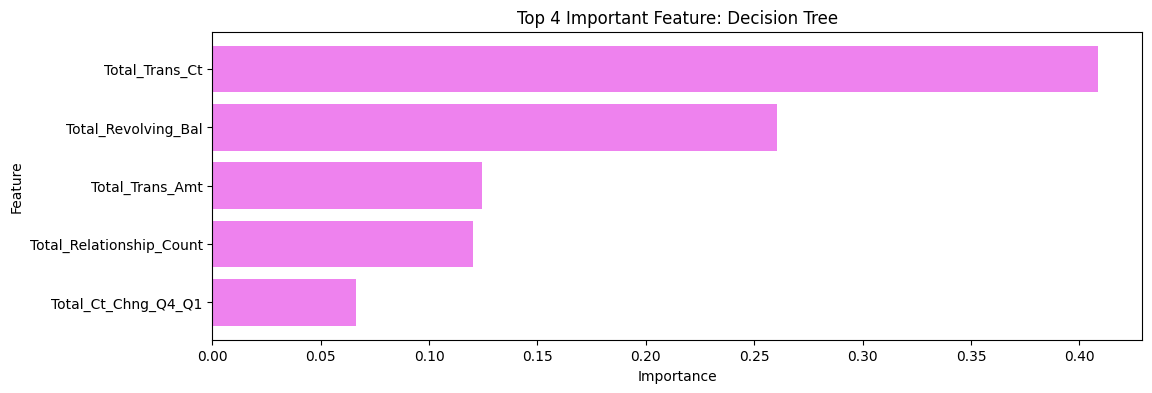

----------------------------------------------------------------------------------------------------
Bagging:

Performance on Training Data: Bagging: 0.9948770491803278
Performance on Validation Data: Bagging: 0.8190184049079755
Bagging does not support feature importance natively.
----------------------------------------------------------------------------------------------------
Random forest:

Performance on Training Data: Random forest: 0.9354508196721312
Performance on Validation Data: Random forest: 0.7760736196319018


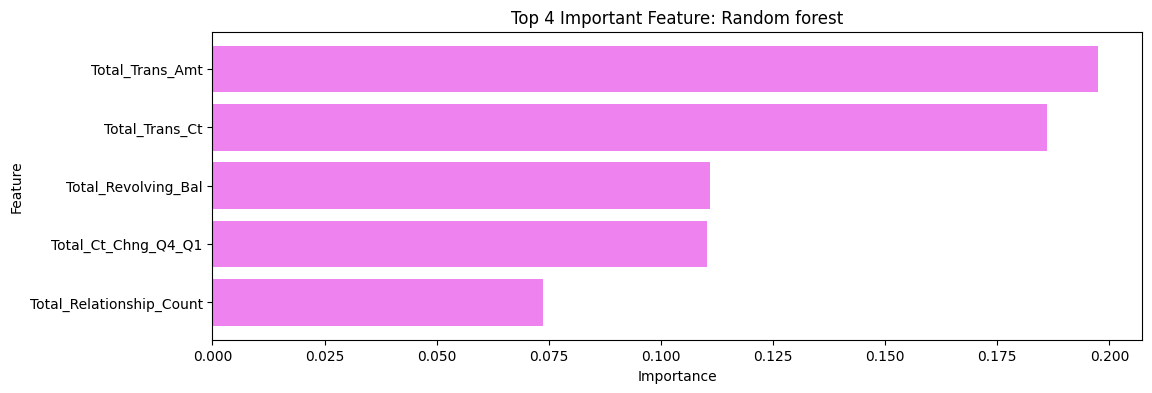

----------------------------------------------------------------------------------------------------
Ada Boost:

Performance on Training Data: Ada Boost: 0.8125
Performance on Validation Data: Ada Boost: 0.7883435582822086


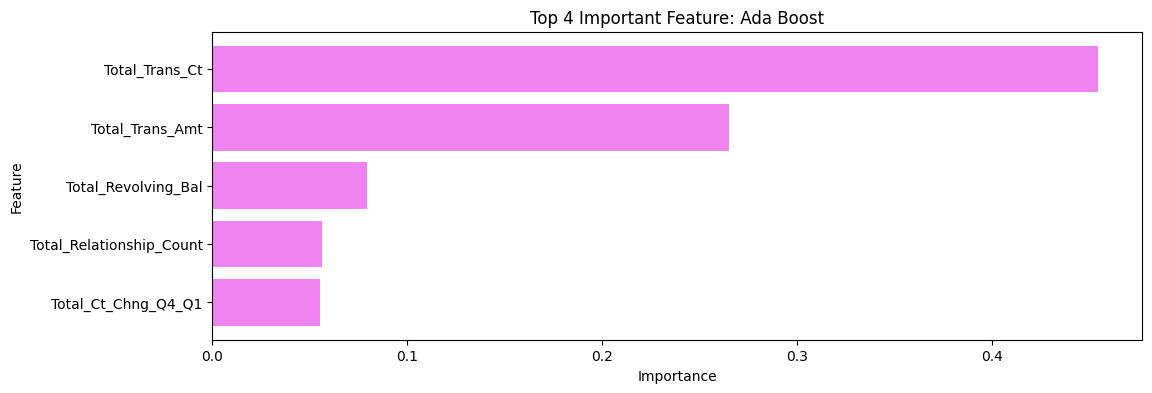

----------------------------------------------------------------------------------------------------
Gradient Boosting:

Performance on Training Data: Gradient Boosting: 1.0
Performance on Validation Data: Gradient Boosting: 0.8098159509202454


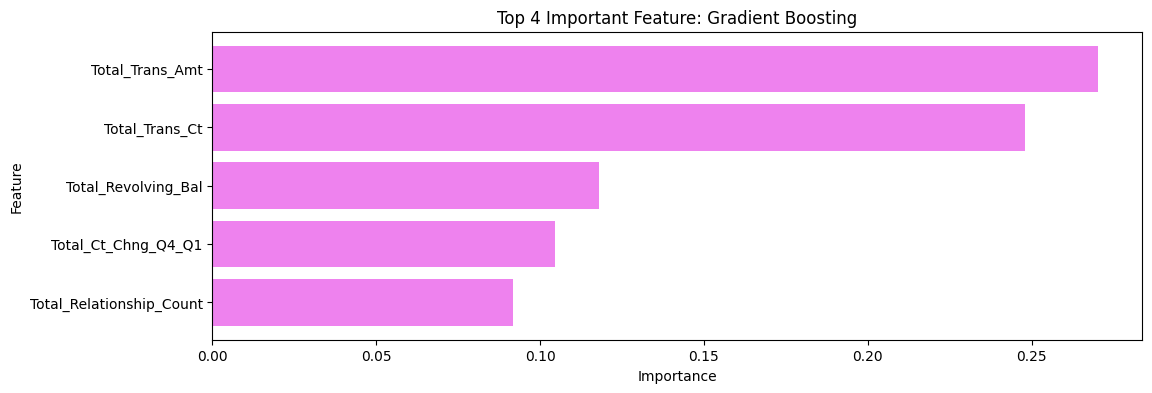

----------------------------------------------------------------------------------------------------
Extreme Gradient Boosting:

Performance on Training Data: Extreme Gradient Boosting: 0.9989754098360656
Performance on Validation Data: Extreme Gradient Boosting: 0.9171779141104295


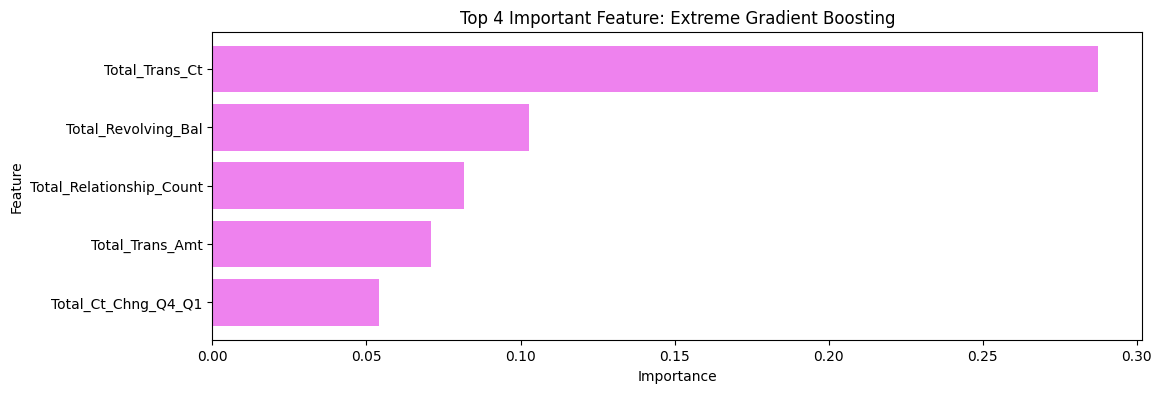

----------------------------------------------------------------------------------------------------


In [62]:
tuned_model_list=model_performance_after_hyperparameter_tuning(X_train,y_train)

<div class='observation_text'>Observation:</div>

Based on above performance we will choose AdaBoost and Extreme Gradient boost as they are generalizing the data better than other models and at the same time giving good performance.

In [63]:
ada_boost_tuned_model=tuned_model_list[3][1]
ada_boost_training_perf=tuned_model_list[3][2]
ada_boost_val_perf=tuned_model_list[3][3]

xgb_tuned_model=tuned_model_list[5][1]
xgb_training_perf=tuned_model_list[5][2]
xgb_val_perf=tuned_model_list[5][3]

#### Model Performance after Hyper parameter tuning on oversampled data


Hyperparameter Tuning on Training Data:

Decision Tree:

Performance on Training Data: Decision Tree: 0.8288235294117647
Performance on Validation Data: Decision Tree: 0.8159509202453987


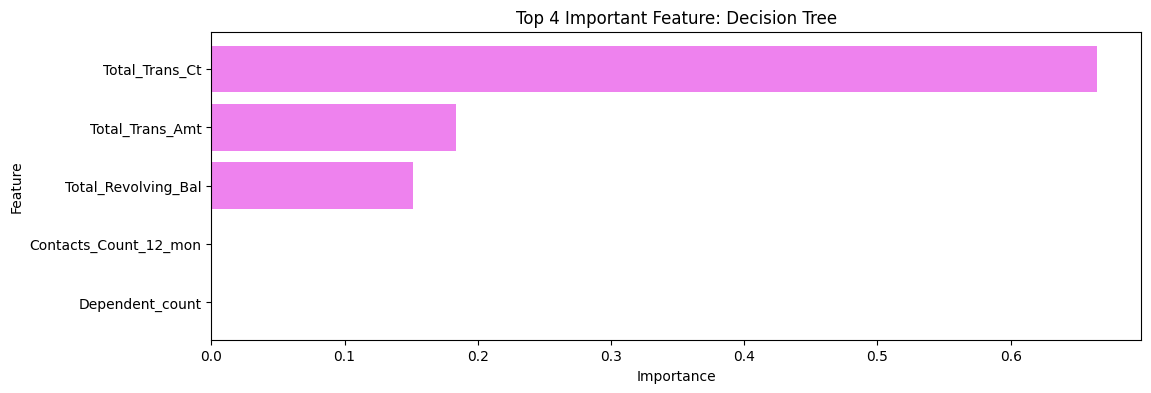

----------------------------------------------------------------------------------------------------
Bagging:

Performance on Training Data: Bagging: 0.9998039215686274
Performance on Validation Data: Bagging: 0.8926380368098159
Bagging does not support feature importance natively.
----------------------------------------------------------------------------------------------------
Random forest:

Performance on Training Data: Random forest: 0.9980392156862745
Performance on Validation Data: Random forest: 0.8895705521472392


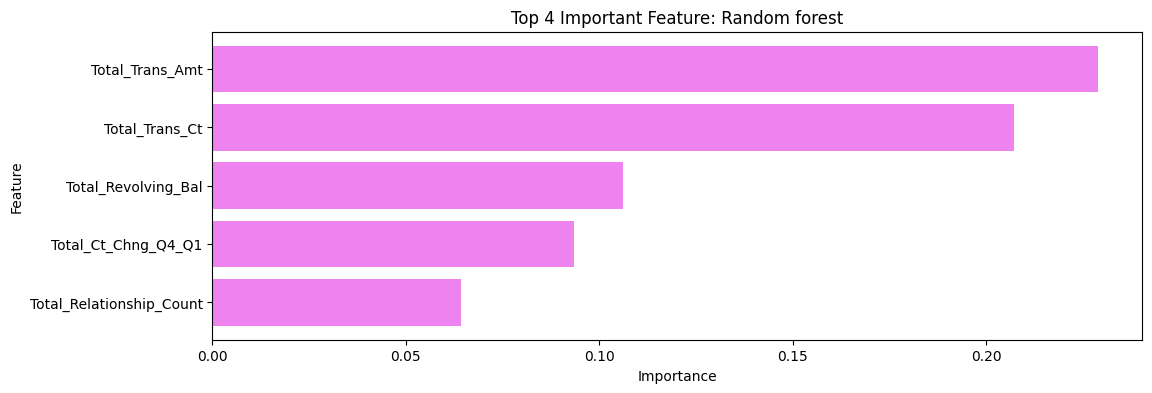

----------------------------------------------------------------------------------------------------
Ada Boost:

Performance on Training Data: Ada Boost: 0.9750980392156863
Performance on Validation Data: Ada Boost: 0.901840490797546


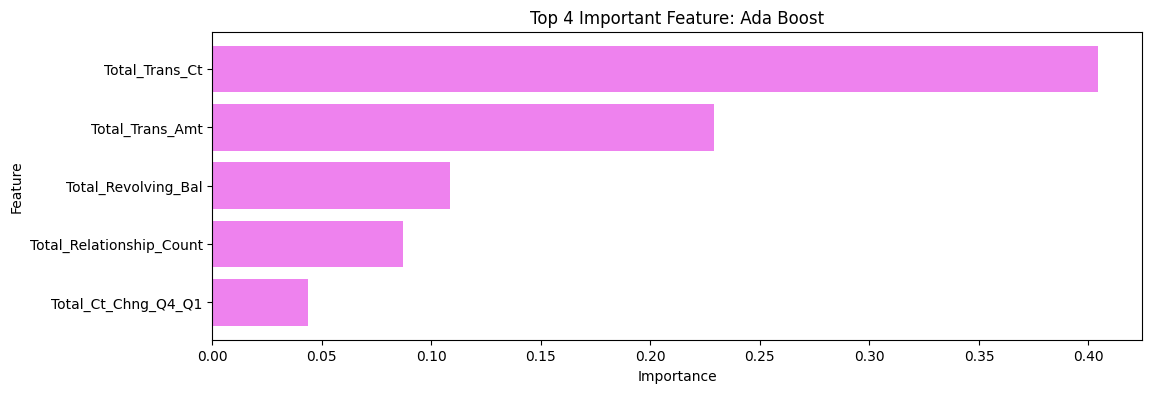

----------------------------------------------------------------------------------------------------
Gradient Boosting:

Performance on Training Data: Gradient Boosting: 0.972156862745098
Performance on Validation Data: Gradient Boosting: 0.9049079754601227


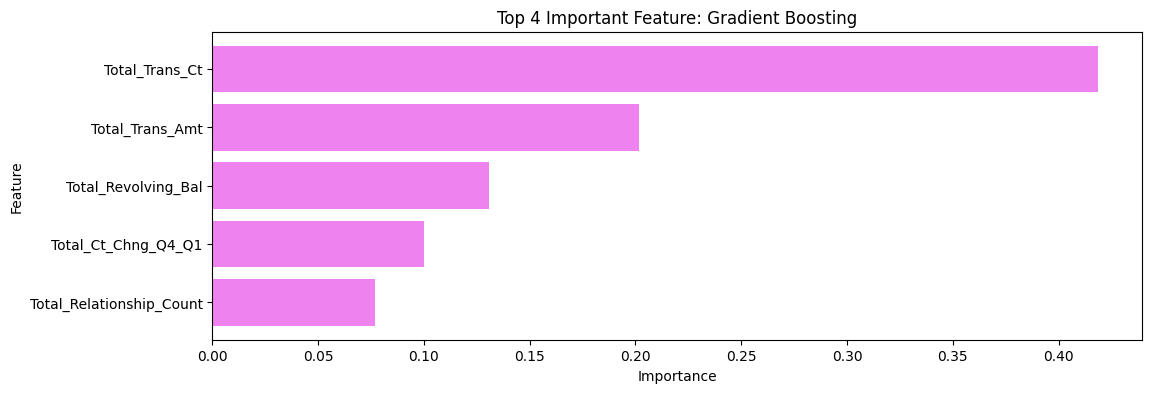

----------------------------------------------------------------------------------------------------
Extreme Gradient Boosting:

Performance on Training Data: Extreme Gradient Boosting: 1.0
Performance on Validation Data: Extreme Gradient Boosting: 0.9938650306748467


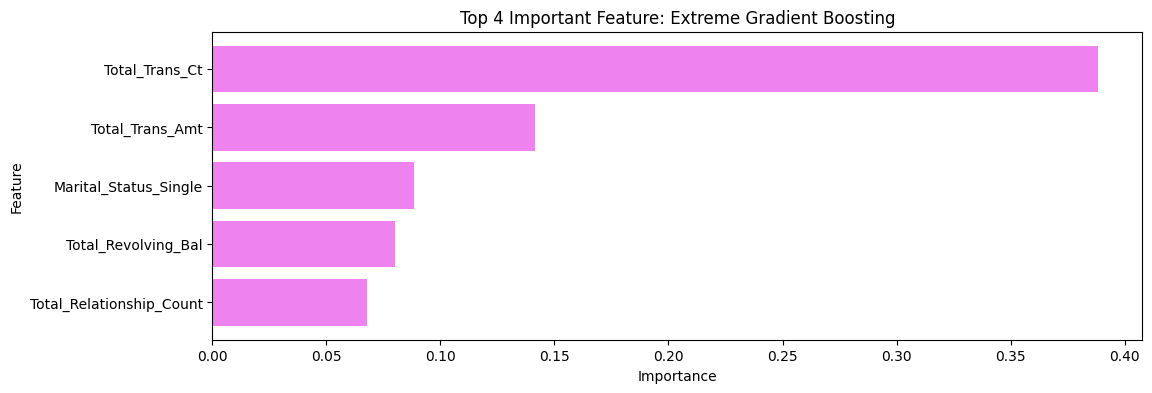

----------------------------------------------------------------------------------------------------


In [64]:
tuned_model_list_over=model_performance_after_hyperparameter_tuning(X_train_over,y_train_over)

<div class='observation_text'>Observation:</div>

Based on above performance we will choose Decision Tree, Gradient Boost and Extreme Gradient boost as they are generalizing the data better than other models.

In [65]:
decision_tree_tuned_over_model=tuned_model_list_over[0][1]
decision_tree_over_training_perf=tuned_model_list_over[0][2]
decision_tree_over_val_perf=tuned_model_list_over[0][3]

gradient_boost_tuned_over_model=tuned_model_list_over[4][1]
gradient_boost_over_training_perf=tuned_model_list_over[4][2]
gradient_boost_over_val_perf=tuned_model_list_over[4][3]

xgb_tuned_over_model=tuned_model_list_over[5][1]
xgb_over_training_perf=tuned_model_list_over[5][2]
xgb_over_val_perf = tuned_model_list_over[5][3]

#### Model Performance after Hyper parameter tuning on under sampled data


Hyperparameter Tuning on Training Data:

Decision Tree:

Performance on Training Data: Decision Tree: 0.9743852459016393
Performance on Validation Data: Decision Tree: 0.9662576687116564


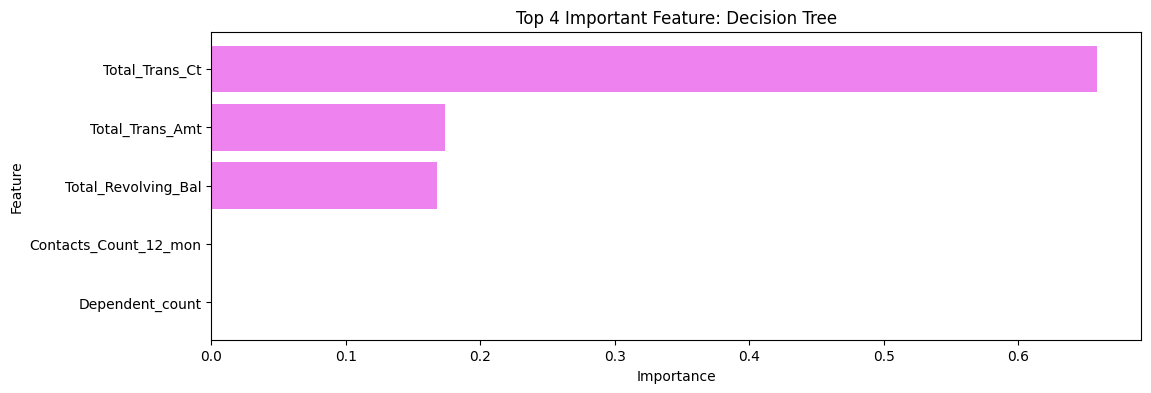

----------------------------------------------------------------------------------------------------
Bagging:

Performance on Training Data: Bagging: 0.0
Performance on Validation Data: Bagging: 0.0
Bagging does not support feature importance natively.
----------------------------------------------------------------------------------------------------
Random forest:

Performance on Training Data: Random forest: 0.9948770491803278
Performance on Validation Data: Random forest: 0.9171779141104295


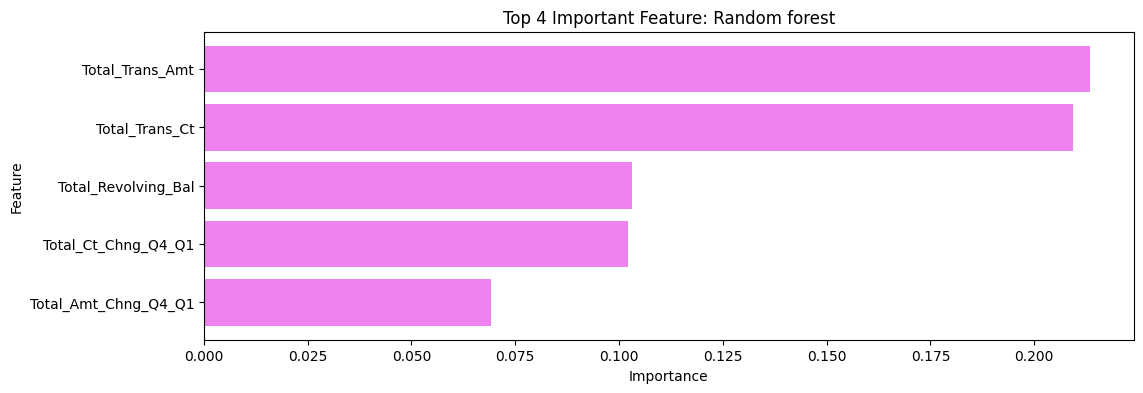

----------------------------------------------------------------------------------------------------
Ada Boost:

Performance on Training Data: Ada Boost: 0.9528688524590164
Performance on Validation Data: Ada Boost: 0.9233128834355828


----------------------------------------------------------------------------------------------------
Gradient Boosting:

Performance on Training Data: Gradient Boosting: 0.9549180327868853
Performance on Validation Data: Gradient Boosting: 0.9539877300613497


----------------------------------------------------------------------------------------------------
Extreme Gradient Boosting:

Performance on Training Data: Extreme Gradient Boosting: 1.0
Performance on Validation Data: Extreme Gradient Boosting: 1.0


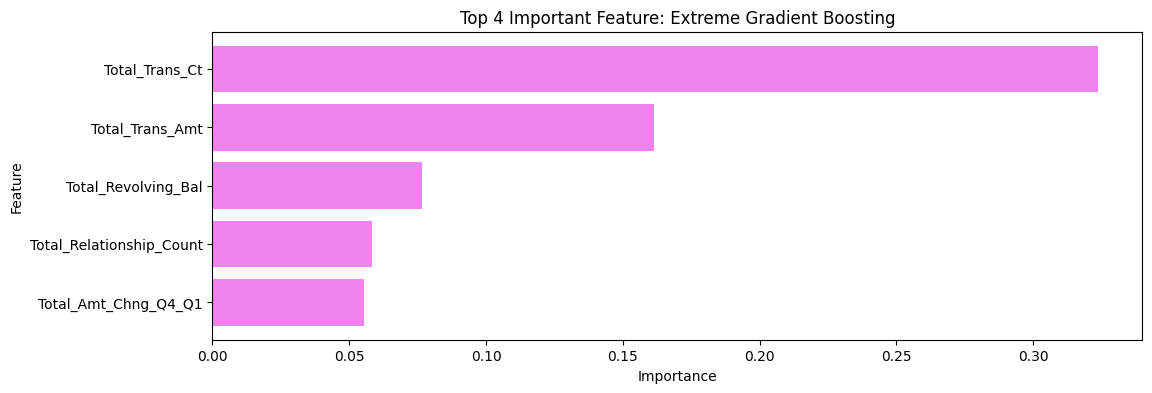

----------------------------------------------------------------------------------------------------


In [66]:
tuned_model_list_un=model_performance_after_hyperparameter_tuning(X_train_un,y_train_un)

<div class='observation_text'>Observation:</div>

Based on above performance we will choose Decision Tree, Bagging and Extreme Gradient Boost as they are generalizing the data better than other models.

In [67]:
decision_tree_tuned_un_model=tuned_model_list_un[0][1]
decision_tree_un_training_perf=tuned_model_list_un[0][2]
decision_tree_un_val_perf=tuned_model_list_un[0][3]

ada_boost_tuned_un_model=tuned_model_list_un[3][1]
ada_boost_un_training_perf=tuned_model_list_un[3][2]
ada_boost_un_val_perf=tuned_model_list_un[3][3]

xgb_tuned_un_model=tuned_model_list_un[5][1]
xgb_un_training_perf=tuned_model_list_un[5][2]
xgb_un_val_perf=tuned_model_list_un[5][3]

## Model Comparison and Final Model Selection

In [68]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        ada_boost_training_perf.T,
        xgb_training_perf.T,
        decision_tree_over_training_perf.T,
        gradient_boost_over_training_perf.T,
        xgb_over_training_perf.T,
        decision_tree_un_training_perf.T,
        ada_boost_un_training_perf.T,
        xgb_un_training_perf.T,
        
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Ada Boost",
    "XGB",
    "Oversampled Decision Tree",
    "Oversampled Gradient Boosting",
    "Oversampled XGB",
    "Undersampled Decision Tree",
    "Undersampled Ada Boost",
    "Undersampled XGB",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Ada Boost       XGB  Oversampled Decision Tree  \
Accuracy    0.959513  0.987492                   0.778333   
Recall      0.812500  0.998975                   0.828824   
Precision   0.926402  0.928571                   0.752805   
F1          0.865721  0.962488                   0.788987   

           Oversampled Gradient Boosting  Oversampled XGB  \
Accuracy                        0.959510         0.810392   
Recall                          0.972157         1.000000   
Precision                       0.948174         0.725050   
F1                              0.960015         0.840613   

           Undersampled Decision Tree  Undersampled Ada Boost  \
Accuracy                     0.779201                0.949795   
Recall                       0.974385                0.952869   
Precision                    0.700811                0.947047   
F1                           0.815259                0.949949   

           Undersampled XGB  
Accuracy           0.757684  
Recall             1.000000  
Precision          0.673568  
F1                 0.804948

In [69]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        ada_boost_val_perf.T,
        xgb_val_perf.T,
        decision_tree_over_val_perf.T,
        gradient_boost_over_val_perf.T,
        xgb_over_val_perf.T,
        decision_tree_un_val_perf.T,
        ada_boost_un_val_perf.T,
        xgb_un_val_perf.T,
        
    ],
    axis=1,
)
models_val_comp_df.columns = models_train_comp_df.columns

print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


Ada Boost       XGB  Oversampled Decision Tree  \
Accuracy    0.953603  0.962488                   0.739882   
Recall      0.788344  0.917178                   0.815951   
Precision   0.911348  0.859195                   0.362892   
F1          0.845395  0.887240                   0.502361   

           Oversampled Gradient Boosting  Oversampled XGB  \
Accuracy                        0.929418         0.662883   
Recall                          0.904908         0.993865   
Precision                       0.724816         0.322388   
F1                              0.804911         0.486852   

           Undersampled Decision Tree  Undersampled Ada Boost  \
Accuracy                     0.616979                0.923988   
Recall                       0.966258                0.923313   
Precision                    0.291667                0.700000   
F1                           0.448080                0.796296   

           Undersampled XGB  
Accuracy           0.572063  
Recall             1.000000  
Precision          0.273261  
F1                 0.429230

<div class='custom_header'>Choose Final Model</div>

- The XGBoost model with hyper parameter tuning and trained with undersampled dataset, has best recall on validation set of 100%, but accuracy is like random guessing (little more than 57%).

- The validation recall of 92.6% is provided by the XGB with hyper parameter tuning trained with original dataset, has validation accuracy more than 96%, and precision of 85.07%.

- Overall, we can conclude that tuned eXtreme Gradient Boosting (XGB) without oversampling or undersampling performs the best and shows minimal overfitting. However, since our primary goal is to improve recall, we might also consider the undersampled models or the oversampled XGB. Let’s evaluate their performance on unseen test data to make the final decision.


### Test set final performance

In [70]:
# On Regular Tuned Model:
test_perf_xgb=model_performance_classification_sklearn(xgb_tuned_model, xgb_tuned_model.predict(X_test), y_test)

# On Underfitted Tuned Model:
test_perf_xgb_un=model_performance_classification_sklearn(xgb_tuned_un_model, xgb_tuned_un_model.predict(X_test), y_test)

In [71]:
models_test_comp_df = pd.concat(
    [
        test_perf_xgb.T,
        test_perf_xgb_un.T,
    ],
    axis=1,
)
models_test_comp_df.columns = ["XGB","XGB undersampled"]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


XGB  XGB undersampled
Accuracy   0.955556          0.588642
Recall     0.920000          1.000000
Precision  0.823691          0.280656
F1         0.869186          0.438301

<div class='observation_text'>Observation:</div>

1. We can observe the XGB on undersampled data still giving good recall on unseen test data, however its precision is very very low. We should only choose this model when knowing who will churn is the only predictor for our model selection becuase if we choose this model the marketing cost can increase a lot.
2. On the other hand, XGB without any sampling provides the best overall performance, balancing recall and precision. However, it might miss some actual churners, potentially resulting in lost business for the bank.
3. As data scientists, we will present both models to the bank, explaining their pros and cons. The final decision should be made based on the bank’s priorities and risk tolerance.

# Business Insights and Conclusions

- Based on our final models, the five most important indicators to predict whether a customer will leave the bank are:
    - Total_Trans_Ct: Total Transaction Count
    - Total_Trans_Amt: Total Transaction Amount
    - Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
    - Total_Relationship_Count: Total no. of products held by the customer
    - Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
	These features are all negatively correlated with the Attrition_Flag, as shown in our correlation matrix.
- Monitoring System: We can build a system using these five (or fewer) key features. If any of these metrics decrease, the bank’s sales team can reach out to understand and solve the customer’s problem.
- Segment-Specific Support: 
    - Provide dedicated support for high-risk groups, such as high-income or platinum cardholders, to meet their unique needs.
    - Assign dedicated relationship managers to high-spending customers to provide personalized support and address their needs quickly.
- Encourage Spending: Offer bonus points or rewards or cashback for higher spending to keep customers engaged.
- Promote More Bank Products: Since customers with more products are less likely to leave, train a sales team to offer additional products at special rates and explain their benefits to customers.
- Introduce flexible EMI plans to increase transaction amounts. Consider offering 0% EMI options to encourage usage.
- Offer different types of credit cards based on customer spending habits, such as cards specifically for shopping, travel, or dining.